# Lending Club Case Study

**Problem Statement**

The company wants to understand the driving factors (or driver variables) behind loan default, i.e. the variables which are strong indicators of default.  The company can utilise this knowledge for its portfolio and risk assessment. 

In [59]:
#Import the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


pd.set_option('display.max_rows', 111)

import warnings
warnings.filterwarnings('ignore')



In [6]:
#read the dataset and check the first five rows
df0 = pd.read_csv('loan.csv')
df0.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [7]:
#Check the shape of the dataframe
print(df0.shape)
df0.info(max_cols=111)

(39717, 111)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 111 columns):
 #    Column                          Non-Null Count  Dtype  
---   ------                          --------------  -----  
 0    id                              39717 non-null  int64  
 1    member_id                       39717 non-null  int64  
 2    loan_amnt                       39717 non-null  int64  
 3    funded_amnt                     39717 non-null  int64  
 4    funded_amnt_inv                 39717 non-null  float64
 5    term                            39717 non-null  object 
 6    int_rate                        39717 non-null  object 
 7    installment                     39717 non-null  float64
 8    grade                           39717 non-null  object 
 9    sub_grade                       39717 non-null  object 
 10   emp_title                       37258 non-null  object 
 11   emp_length                      38642 non-null  object 
 12   hom

## Data Understanding
- Many columns are having null values which can be dropped

## Data Cleaning and Manipulation
Data Quality Issues can be treated by
- For Missing Values in the Columns:
    - Dropping the columns containing maximum null values
    - Dropping the coumns which are not required for the analysis
    - Drop columns with single value
    - Drop columns which does not add any value to analysis.
    - Keep the missing values if they don't affect the analysis
- For Missing Values in the Rows 
    - Filter rows to perform targeted analysis 
    - Dropping the rows containing the missing values
    - Check for data inconsistencies
- Missing Value Imputation
- Incorrect Data Types:
    - Clean certain values/Manipulation of strings 
    - Clean and convert an entire column to correct data type e.g date, int64 etc.
    - Converting the columns to numeric variables in order to perform more analysis.
- Treating outliers


#### Missing Vaue Treatment

In [8]:
#Calculate missing value %
df_null_pct = df0.isnull().sum()/len(df0)*100
df_null_pct.sort_values(ascending = False)

verification_status_joint         100.000000
annual_inc_joint                  100.000000
mo_sin_old_rev_tl_op              100.000000
mo_sin_old_il_acct                100.000000
bc_util                           100.000000
bc_open_to_buy                    100.000000
avg_cur_bal                       100.000000
acc_open_past_24mths              100.000000
inq_last_12m                      100.000000
total_cu_tl                       100.000000
inq_fi                            100.000000
total_rev_hi_lim                  100.000000
all_util                          100.000000
max_bal_bc                        100.000000
open_rv_24m                       100.000000
open_rv_12m                       100.000000
il_util                           100.000000
total_bal_il                      100.000000
mths_since_rcnt_il                100.000000
open_il_24m                       100.000000
open_il_12m                       100.000000
open_il_6m                        100.000000
open_acc_6

In [9]:
#Filter columns with more than or equal to 50% missing values which will be our threshold to drop the columns
df0 = df0.loc[:,df_null_pct<50]

In [10]:
df0.shape

(39717, 54)

In [11]:
# List the coumns which are not required for the analysis. Total 21 columns
list_drop_col1 = ['delinq_2yrs','earliest_cr_line','inq_last_6mths','open_acc','pub_rec','revol_bal','revol_util','total_acc','out_prncp','out_prncp_inv','total_pymnt','total_pymnt_inv','total_rec_prncp','total_rec_int','total_rec_late_fee','recoveries','collection_recovery_fee','last_pymnt_d','last_pymnt_amnt','last_credit_pull_d','application_type']

In [12]:
# Drop the coumns which are not required for the analysis. Total 21 columns
df0.drop(list_drop_col1,axis=1,inplace = True)

In [13]:
df0.shape

(39717, 33)

**Drop columns with single value as these will not be helpful in the analysis**

In [14]:
#Observe columns having single value
unique = df0.nunique()
unique.sort_values()

tax_liens                         1
delinq_amnt                       1
chargeoff_within_12_mths          1
acc_now_delinq                    1
policy_code                       1
collections_12_mths_ex_med        1
initial_list_status               1
pymnt_plan                        1
term                              2
pub_rec_bankruptcies              3
verification_status               3
loan_status                       3
home_ownership                    5
grade                             7
emp_length                       11
purpose                          14
sub_grade                        35
addr_state                       50
issue_d                          55
int_rate                        371
zip_code                        823
loan_amnt                       885
funded_amnt                    1041
dti                            2868
annual_inc                     5318
funded_amnt_inv                8205
installment                   15383
title                       

In [15]:
list_col_unique_val = unique[unique.values==1]
print(list_col_unique_val)

pymnt_plan                    1
initial_list_status           1
collections_12_mths_ex_med    1
policy_code                   1
acc_now_delinq                1
chargeoff_within_12_mths      1
delinq_amnt                   1
tax_liens                     1
dtype: int64


In [16]:
#Drop columns having single value
list_drop_col2=list_col_unique_val.index.tolist()
df0.drop(list_drop_col2,axis=1,inplace = True)
df0.shape

(39717, 25)

**Drop columns which does not add any value to analysis.(id, member_id, url, desc,zip_code)**

In [17]:
list_drop_col3 = ["id", "member_id", "url", "desc","zip_code"]
df0.drop(list_drop_col3,axis=1,inplace = True)
df0.shape

(39717, 20)

**Filter rows to perform targeted analysis**
- Filter based on loan_status equal to "Charged Off" and "Fully Paid" since loan_status equal to "Current" are the customers whose loan is currently active at that point in time and does not provide concrete information whether they will turn into fully paid or charged off by the end of the loan tenure.


In [18]:
df0.loan_status.value_counts()

Fully Paid     32950
Charged Off     5627
Current         1140
Name: loan_status, dtype: int64

In [19]:
df0 = df0[df0.loan_status.isin(["Fully Paid","Charged Off"])]
df0.shape

(38577, 20)

**Filter out rows containing missing values more than or equal to 50%.**
- Check for rows with more than 50% of missing values and drop them

In [20]:
df0.isnull().sum(axis=1).sort_values(ascending=False)


28700    3
3297     2
18511    2
18729    2
18722    2
        ..
16008    0
16007    0
16006    0
16005    0
20428    0
Length: 38577, dtype: int64

In [21]:
df_missing_val_row = df0.isnull().sum(axis=1)/df0.shape[1]*100
print(df_missing_val_row.sort_values(ascending=False))

28700    15.0
3297     10.0
18511    10.0
18729    10.0
18722    10.0
         ... 
16008     0.0
16007     0.0
16006     0.0
16005     0.0
20428     0.0
Length: 38577, dtype: float64


In [22]:
#Identify rows with missing values greater than or equal to 50%
df_missing_val_row[df_missing_val_row>=50]

Series([], dtype: float64)

**Analysis: There are no rows with missing values >=50% Hence no need to drop any rows**

**Check for data inconsistencies**
- Drop rows if "funded_amnt_inv" is greater than "loan_amnt"

In [23]:
df0[df0.funded_amnt_inv > df0.loan_amnt]

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,addr_state,dti,pub_rec_bankruptcies


**Analysis: There are no rows with "funded_amnt_inv" is greater than "loan_amnt" Hence no rows should be dropped**

### Missing Value Imputation

In [24]:
#Observe columns with null values
onlynull = df0.isnull().sum()
onlynull[onlynull.values>0]

emp_title               2386
emp_length              1033
title                     11
pub_rec_bankruptcies     697
dtype: int64

In [25]:
#Treating missing values for emp_title
df0["emp_title"].value_counts()

US Army                                     131
Bank of America                             107
IBM                                          65
AT&T                                         57
Kaiser Permanente                            56
                                           ... 
amneal pharmaceuticals                        1
Net Equity Financial                          1
Kernersville Fire Department                  1
The Keith Corp. (empl by county, now Kei      1
Evergreen Center                              1
Name: emp_title, Length: 28027, dtype: int64

In [26]:
df0["emp_title"].mode()

0    US Army
dtype: object

**Analysis: "emp_title" column has approx 6% missing values which can be replaced with mode since this is a categorical variable. But replacing with mode as "US Army" will not be meaningful hence we will not treat the missing values for this column.**

In [27]:
#Drop column emp_title
df0.drop(["emp_title"],axis=1,inplace = True)
df0.shape


(38577, 19)

In [28]:
#Treating missing values for emp_length
df0["emp_length"].value_counts()

10+ years    8488
< 1 year     4508
2 years      4291
3 years      4012
4 years      3342
5 years      3194
1 year       3169
6 years      2168
7 years      1711
8 years      1435
9 years      1226
Name: emp_length, dtype: int64

**Analysis: After observing the values of emp_length it seems that absence of value means the employee is not working for any firm but must be running a business. Hence we can impute the missing value by "Self Employed".**


In [29]:
#Replace null with "Self Employed"
df0["emp_length"] = df0["emp_length"].fillna("Self Employed")
df0["emp_length"].isnull().sum()

0

In [30]:
#Observe values for title column
df0.title.value_counts()


Debt Consolidation           2090
Debt Consolidation Loan      1620
Personal Loan                 641
Consolidation                 491
debt consolidation            478
                             ... 
Murray Loan                     1
Need debt consolidation!        1
freedom2                        1
DAVE WEDDING                    1
JAL Loan                        1
Name: title, Length: 19297, dtype: int64

**Analysis: title column falls under categorical variable but the values cannot be categorized due to variations in values hence it will be difficult to carry on analysis. So we will drop this column.**

In [31]:
#Drop column title
df0.drop(["title"],axis=1,inplace = True)
df0.shape


(38577, 18)

In [32]:
#Treating missing values for pub_rec_bankruptcies
df0.pub_rec_bankruptcies.value_counts()

0.0    36238
1.0     1637
2.0        5
Name: pub_rec_bankruptcies, dtype: int64

In [33]:
#Observe the null records for any inconsistency
df0[df0.pub_rec_bankruptcies.isnull()]

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,addr_state,dti,pub_rec_bankruptcies
35006,15000,15000,14875.000000,36 months,8.94%,476.58,A,A5,< 1 year,MORTGAGE,110000.0,Not Verified,Sep-09,Fully Paid,credit_card,NY,7.07,NaN
35058,3000,3000,2988.236621,36 months,14.26%,102.92,C,C5,3 years,MORTGAGE,80800.0,Not Verified,Sep-09,Fully Paid,credit_card,TX,14.97,NaN
35362,4000,4000,3892.258856,36 months,11.14%,131.22,B,B1,< 1 year,MORTGAGE,60000.0,Not Verified,Aug-09,Charged Off,car,MI,11.08,NaN
38443,2300,2300,589.605658,36 months,13.17%,77.69,D,D2,10+ years,RENT,37152.0,Verified,Aug-08,Fully Paid,moving,NJ,2.26,NaN
38717,6000,6000,500.000000,36 months,8.00%,188.02,A,A3,< 1 year,MORTGAGE,75000.0,Not Verified,May-08,Fully Paid,other,OH,16.08,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39712,2500,2500,1075.000000,36 months,8.07%,78.42,A,A4,4 years,MORTGAGE,110000.0,Not Verified,Jul-07,Fully Paid,home_improvement,CO,11.33,NaN
39713,8500,8500,875.000000,36 months,10.28%,275.38,C,C1,3 years,RENT,18000.0,Not Verified,Jul-07,Fully Paid,credit_card,NC,6.40,NaN
39714,5000,5000,1325.000000,36 months,8.07%,156.84,A,A4,< 1 year,MORTGAGE,100000.0,Not Verified,Jul-07,Fully Paid,debt_consolidation,MA,2.30,NaN
39715,5000,5000,650.000000,36 months,7.43%,155.38,A,A2,< 1 year,MORTGAGE,200000.0,Not Verified,Jul-07,Fully Paid,other,MD,3.72,NaN


**Analysis: Other values seem to be proper and we cannot predict and replace the value with mean hence we will drop such rows where pub_rec_bankruptcies is null.**

In [34]:
#Filter rows with nonnull values of pub_rec_bankruptcies
df0 = df0[~df0.pub_rec_bankruptcies.isnull()]
df0.shape

(37880, 18)

### Handling Data Types

In [35]:
df0.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,addr_state,dti,pub_rec_bankruptcies
0,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,credit_card,AZ,27.65,0.0
1,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,car,GA,1.00,0.0
2,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,small_business,IL,8.72,0.0
3,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,other,CA,20.00,0.0
5,5000,5000,5000.0,36 months,7.90%,156.46,A,A4,3 years,RENT,36000.0,Source Verified,Dec-11,Fully Paid,wedding,AZ,11.20,0.0


In [36]:
df0.dtypes

loan_amnt                 int64
funded_amnt               int64
funded_amnt_inv         float64
term                     object
int_rate                 object
installment             float64
grade                    object
sub_grade                object
emp_length               object
home_ownership           object
annual_inc              float64
verification_status      object
issue_d                  object
loan_status              object
purpose                  object
addr_state               object
dti                     float64
pub_rec_bankruptcies    float64
dtype: object

**After observing the values and datatypes below are the manipulations required**
- Convert "funded_amnt_inv" to int64
- Convert "annual_inc" to int64
- Convert "pub_rec_bankruptcies" to "int64"
- Convert "issue_d" to Datetime
- Convert "term" to "int64" after removing " months" string
- Convert "int_rate" to "float64" after removing "%" symbol.
- Remove "+" symbol from "emp_length".


In [37]:
#Convert "funded_amnt_inv" to int64
print(df0.funded_amnt_inv.dtype)
df0.funded_amnt_inv = df0.funded_amnt_inv.astype("int64")
print(df0.funded_amnt_inv.dtype)

float64
int64


In [38]:
#Convert "annual_inc" to int64
print(df0.annual_inc.dtype)
df0.annual_inc = df0.annual_inc.astype("int64")
print(df0.annual_inc.dtype)

float64
int64


In [39]:
#Convert "pub_rec_bankruptcies" to int64
print(df0.pub_rec_bankruptcies.dtype)
df0.pub_rec_bankruptcies = df0.pub_rec_bankruptcies.astype("int64")
print(df0.pub_rec_bankruptcies.dtype)

float64
int64


In [40]:
#Convert "issue_d" to Datetime
print(df0.issue_d)
df0.issue_d = pd.to_datetime(df0.issue_d,format = '%b-%y')
print(df0.issue_d)
print(df0.issue_d.dtype)

0        Dec-11
1        Dec-11
2        Dec-11
3        Dec-11
5        Dec-11
          ...  
39562    Nov-07
39573    Nov-07
39623    Oct-07
39666    Aug-07
39680    Aug-07
Name: issue_d, Length: 37880, dtype: object
0       2011-12-01
1       2011-12-01
2       2011-12-01
3       2011-12-01
5       2011-12-01
           ...    
39562   2007-11-01
39573   2007-11-01
39623   2007-10-01
39666   2007-08-01
39680   2007-08-01
Name: issue_d, Length: 37880, dtype: datetime64[ns]
datetime64[ns]


In [41]:
#Convert "term" to "int64" after removing " months" string
print(df0.term)
df0.term = df0.term.str.replace(" months",'').astype('int64')
print(df0.term)
print(df0.term.dtype)

0         36 months
1         60 months
2         36 months
3         36 months
5         36 months
            ...    
39562     36 months
39573     36 months
39623     36 months
39666     36 months
39680     36 months
Name: term, Length: 37880, dtype: object
0        36
1        60
2        36
3        36
5        36
         ..
39562    36
39573    36
39623    36
39666    36
39680    36
Name: term, Length: 37880, dtype: int64
int64


In [42]:
#Convert "int_rate" to "float64" after removing "%" symbol.
print(df0.int_rate)
df0.int_rate = df0.int_rate.str.replace("%",'').astype('float64')
print(df0.int_rate)

0        10.65%
1        15.27%
2        15.96%
3        13.49%
5         7.90%
          ...  
39562    10.28%
39573    10.59%
39623    12.49%
39666    11.22%
39680    11.86%
Name: int_rate, Length: 37880, dtype: object
0        10.65
1        15.27
2        15.96
3        13.49
5         7.90
         ...  
39562    10.28
39573    10.59
39623    12.49
39666    11.22
39680    11.86
Name: int_rate, Length: 37880, dtype: float64


In [43]:
#Observe values of emp_length and Remove "+".
df0.emp_length.value_counts()


10+ years        8369
< 1 year         4341
2 years          4207
3 years          3951
4 years          3297
5 years          3161
1 year           3077
6 years          2136
7 years          1689
8 years          1410
9 years          1209
Self Employed    1033
Name: emp_length, dtype: int64

In [44]:
df0.emp_length = df0.emp_length.str.replace("+",'')
df0.emp_length.value_counts()


10 years         8369
< 1 year         4341
2 years          4207
3 years          3951
4 years          3297
5 years          3161
1 year           3077
6 years          2136
7 years          1689
8 years          1410
9 years          1209
Self Employed    1033
Name: emp_length, dtype: int64

# Treatine Outliers

In [45]:
df0.annual_inc.describe()

count    3.788000e+04
mean     6.876386e+04
std      6.357379e+04
min      4.000000e+03
25%      4.000000e+04
50%      5.900000e+04
75%      8.200000e+04
max      6.000000e+06
Name: annual_inc, dtype: float64

## to remove outliers based on annual_inc

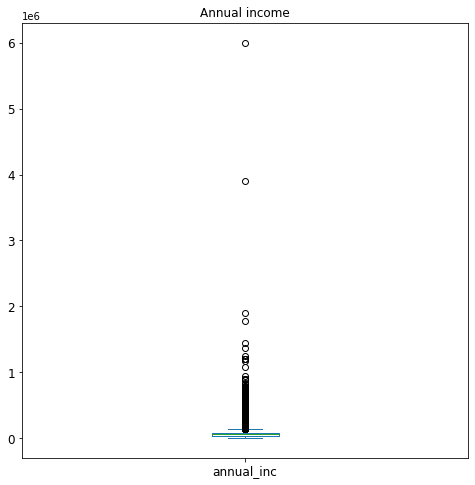

In [46]:
df0.annual_inc.plot.box(fontsize = 12, figsize = (8,8)).set(title='Annual income')
plt.show()


In [47]:

quantiles = df0.annual_inc.quantile([0.01, 0.25, 0.5, 0.75, 0.99])
print(quantiles)


0.01     14400.0
0.25     40000.0
0.50     59000.0
0.75     82000.0
0.99    234000.0
Name: annual_inc, dtype: float64


In [48]:

df1 = df0[(df0.annual_inc > 14400) & (df0.annual_inc<234144)]


In [49]:
# 234000.0 should be the max
df1.annual_inc.max()
quantiles = df1.annual_inc.quantile([0.01, 0.25, 0.5, 0.75, 0.99])
print(quantiles)


0.01     18000.00
0.25     41000.00
0.50     59000.00
0.75     81000.00
0.99    188063.76
Name: annual_inc, dtype: float64


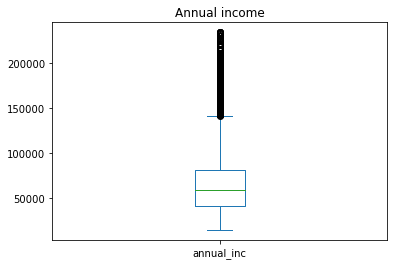

In [50]:
df1.annual_inc.plot.box().set(title='Annual income')
plt.show()

Creating different groups for interest rate, annual income to handle them better

Int_rate is between 5% to 25%, grouping them accordingly


Annual inc
As this is the min, max and percentiles, grouping them accordingly
0.01     14400.0
0.25     40000.0
0.50     59000.0
0.75     82000.0
0.99    234000.0

In [51]:
df1.int_rate.describe

<bound method NDFrame.describe of 0        10.65
1        15.27
3        13.49
5         7.90
6        15.96
         ...  
39562    10.28
39573    10.59
39623    12.49
39666    11.22
39680    11.86
Name: int_rate, Length: 37095, dtype: float64>

In [52]:
#Treating for int_rate
bins = [5, 9, 13, 17, 21, 25]
labels = ['5%-9%','9%-13%','13%-17%','17%-21%','21%-25%']

df1['int_rate_group'] = pd.cut(df1['int_rate'], bins=bins,
                               labels=labels)



In [53]:
df1['int_rate_group'].value_counts()

9%-13%     13469
13%-17%    10680
5%-9%       9486
17%-21%     3134
21%-25%      326
Name: int_rate_group, dtype: int64

In [54]:
#Treating for annual_income
bins = [ 14400, 25000, 50000, 100000,150000,234000]
labels = ['14k-25k','25k-50k','50k-100k','100k-150k','150k-250k']

df1['annual_inc_group'] = pd.cut(df1['annual_inc'], bins=bins,
                               labels=labels)


In [55]:
df1['annual_inc_group'].value_counts()

50k-100k     17424
25k-50k      12599
100k-150k     3925
14k-25k       2066
150k-250k     1081
Name: annual_inc_group, dtype: int64

In [57]:

def autolabel(ax,x):
    """
    Attach a text label above each bar displaying its height
    """
    for p in ax.patches:
        ax.annotate('{:1}'.format(p.get_height()), (p.get_x()+x, p.get_height()+10))




## Data Analysis
- Univariate Analysis
- Bivariate Analysis
- Segmented Univariate Analysis
- Derived Matrics Analysis
- Multivariate Analysis

In [77]:
#Derived metrics analysis on column "issue_d"
df1["issue_y"]=df0.issue_d.dt.year
df1["issue_m"]=df0.issue_d.dt.month

In [78]:
df1[["issue_d","issue_m","issue_y"]].head()

,issue_d,issue_m,issue_y
0,2011-12-01,12,2011
1,2011-12-01,12,2011
3,2011-12-01,12,2011
5,2011-12-01,12,2011
6,2011-12-01,12,2011


In [79]:
#Calculate Loan to Amount income ratio
df1["amnt_to_inc_ratio"] = df1.loan_amnt/df1.annual_inc
df1[["loan_amnt", "annual_inc","amnt_to_inc_ratio"]]

,loan_amnt,annual_inc,amnt_to_inc_ratio
0,5000,24000,0.208333
1,2500,30000,0.083333
3,10000,49200,0.203252
5,5000,36000,0.138889
6,7000,47004,0.148923
...,...,...,...
39562,4800,35000,0.137143
39573,7000,63500,0.110236
39623,9000,39000,0.230769
39666,15450,40000,0.386250


In [80]:
#Create new column loan_status_code with 0 and 1 values based on loan_status column where 0="Charged Off" and 1="Fully Paid"
loan_status_map = {'Charged Off':0,'Fully Paid':1 }
df1["loan_status_code"] = df1["loan_status"].map(loan_status_map)
print(df1["loan_status_code"])

0        1
1        0
3        1
5        1
6        1
        ..
39562    1
39573    1
39623    0
39666    0
39680    1
Name: loan_status_code, Length: 37095, dtype: int64


In [81]:
df1.loan_status_code.value_counts()

1    31728
0     5367
Name: loan_status_code, dtype: int64

In [151]:
df1["verification_status"] = df1.verification_status.str.replace("Source Verified", "Verified")

df1.verification_status.value_counts()



Verified        21384
Not Verified    15711
Name: verification_status, dtype: int64

### Univariate Analysis

Following fields will be checked as part of uni variate analysis


#### A) Categorical variables
##### A.1) Ordered categorical data
- Grade 
- Sub grade 
- Term (36 / 60 months) 
- Employment length 
- Loan issue year 
- Loan issue month

##### A.2)  Un-ordered categorical data
- State 
- Loan purpose 
- Home Ownership 
- Loan status

#### B) Quantitative
- Interest rate group
- Annual income group
- Loan amount
- Funded amount
- Instalment amount *
- Loan amount to annual income ratio*
- pub_rec_bankruptcies *


# A.1) Ordered categorical data

## Grade (fully paid and charged off)


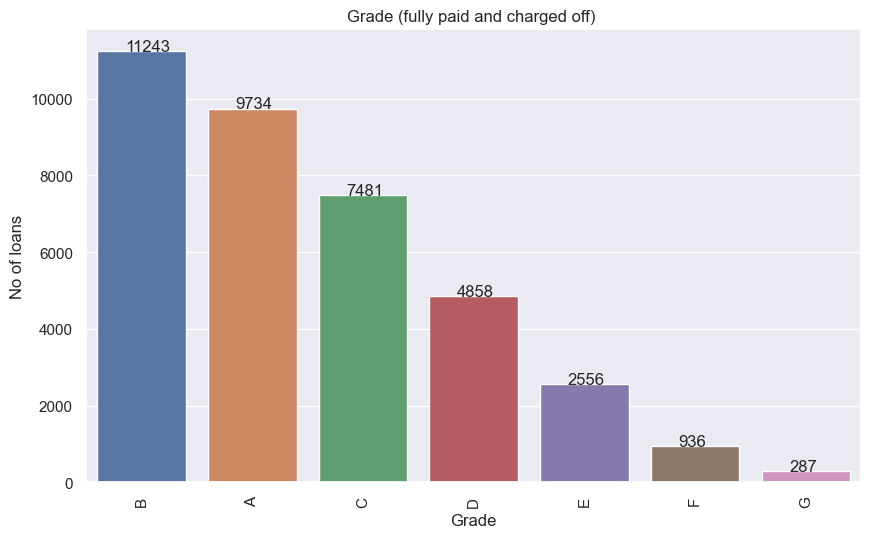

In [242]:
fig, ax = plt.subplots(figsize=(10,6)  , dpi=100)

sns.countplot(x="grade", 
              data=df1, 
              order = df1.grade.value_counts().index)
    
ax.set_xlabel('Grade')
ax.set_ylabel('No of loans')

ax.set_title('Grade (fully paid and charged off) ')
plt.xticks(rotation=90)

autolabel(ax,0.25)

plt.show()

Observation 
- Loan issued for various grades
- This shows Grade A and B are given more loans compared to other grades

## Sub Grade (fully paid and charged off)



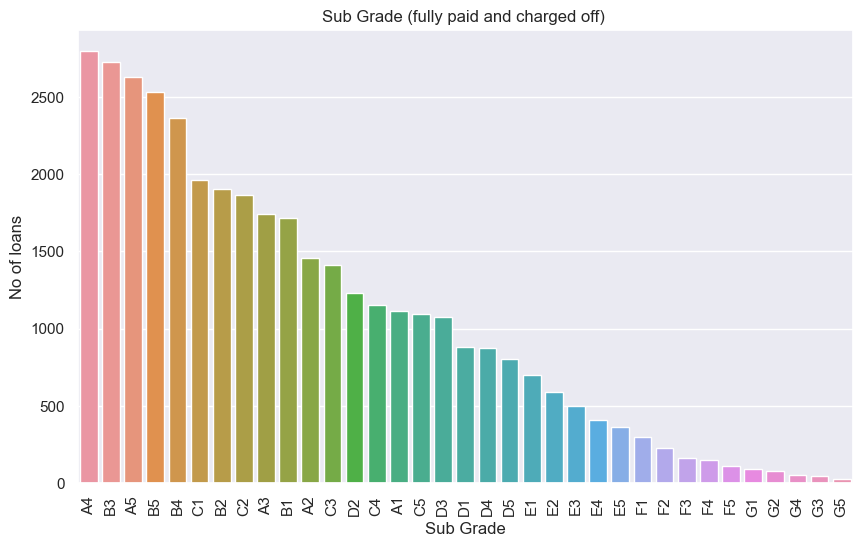

In [241]:
fig, ax = plt.subplots(figsize=(10,6)  , dpi=100)

sns.countplot(x="sub_grade", 
              data=df1, 
              order = df1.sub_grade.value_counts().index)
    
ax.set_xlabel('Sub Grade')
ax.set_ylabel('No of loans')

ax.set_title('Sub Grade (fully paid and charged off) ')
plt.xticks(rotation=90)

plt.show()

Observation 
- This shows Grade A4, B3, A5, B5, B4 are given more loans compared to other grades

## Term 36/60 months (fully paid and charged off)

- Loan issued for terms

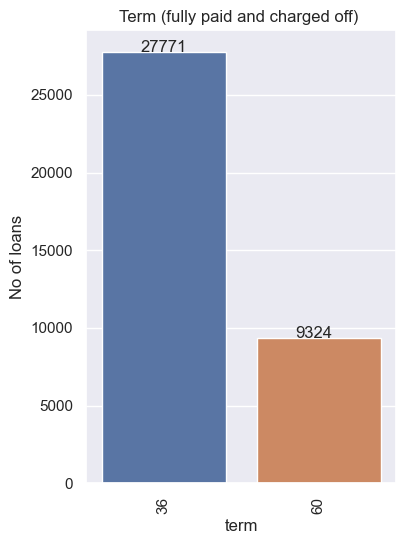

In [240]:
fig, ax = plt.subplots(figsize=(4,6)  , dpi=100)

sns.countplot(x="term", 
              data=df1, 
              order = df1.term.value_counts().index)
    
ax.set_xlabel('term')
ax.set_ylabel('No of loans')

ax.set_title('Term (fully paid and charged off) ')
plt.xticks(rotation=90)

autolabel(ax,0.25)

plt.show()

Observation 
- This shows 36 months loans are issued more compared to 60 months loan

## Impact of Employment length on loans issued (fully paid and charged off)



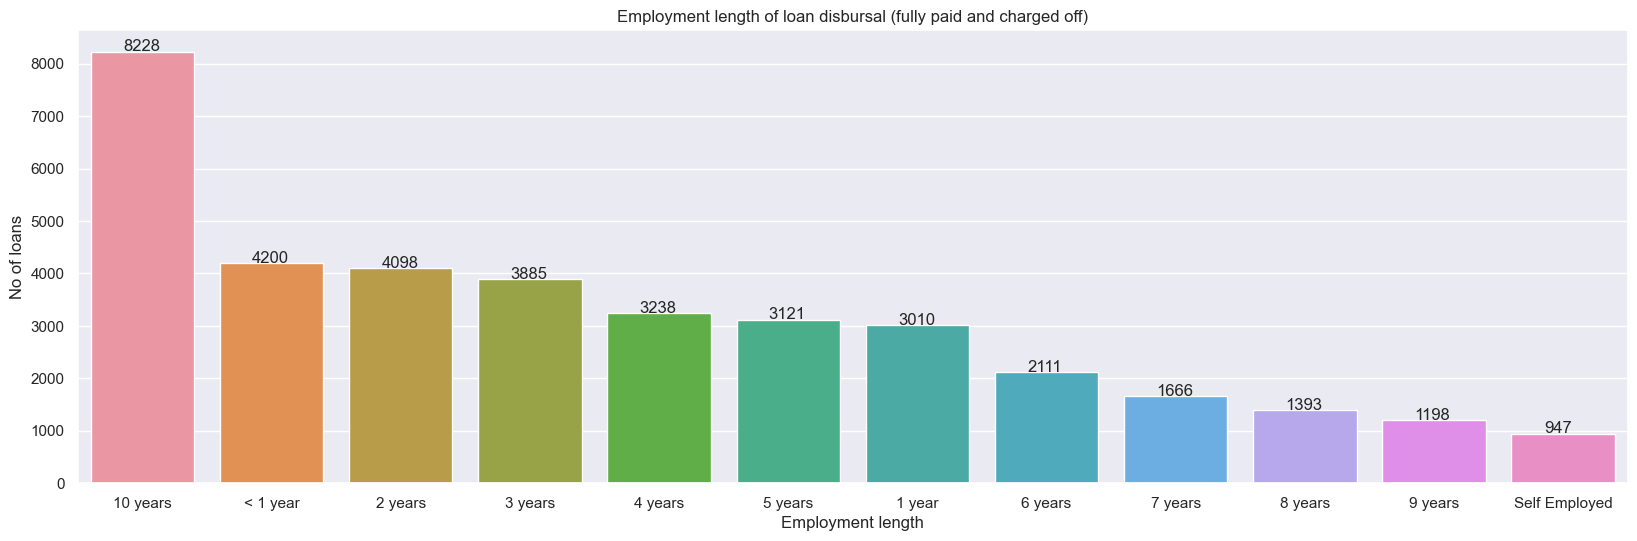

In [239]:
# why it is not significantly different?  
import seaborn as sns

fig, ax = plt.subplots(figsize=(20,6)  , dpi=100)

sns.countplot(x='emp_length', 
              data=df1, 
              order = df1.emp_length.value_counts().index)
 
ax.set_xlabel('Employment length')
ax.set_ylabel('No of loans')

ax.set_title('Employment length of loan disbursal (fully paid and charged off)')
autolabel(ax,0.25)


plt.show()

**Observation**
- This shows employees with 10 years and above are given loan comapred with lesser experience


## Loan issue year

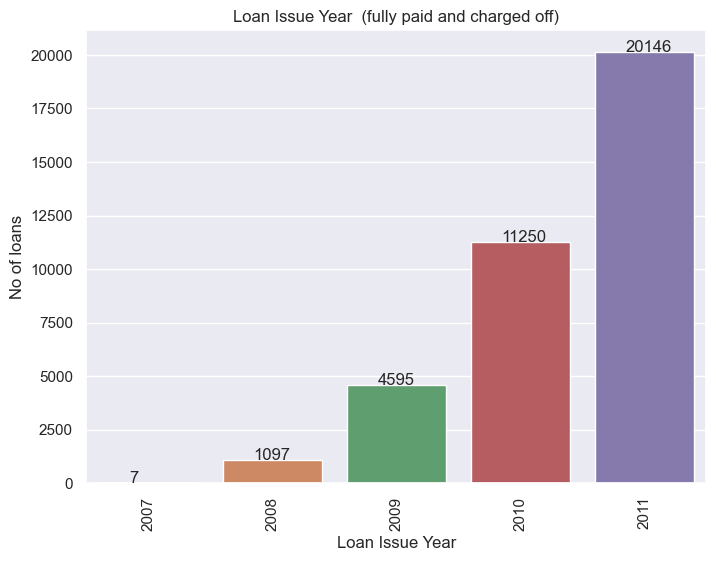

In [238]:
#Bivariate for issue_y
fig, ax = plt.subplots(figsize=(8,6)  , dpi=100)
plt.xticks(rotation=90)
sns.countplot(x='issue_y',
              data=df1)
              

ax.set_xlabel('Loan Issue Year')
ax.set_ylabel('No of loans')

autolabel(ax,0.25)
ax.set_title('Loan Issue Year  (fully paid and charged off)')

plt.show()

**Observation**
- This shows lending club has been given more loans in 2011 compared with previous years and its doubling every year

## Loan issue month

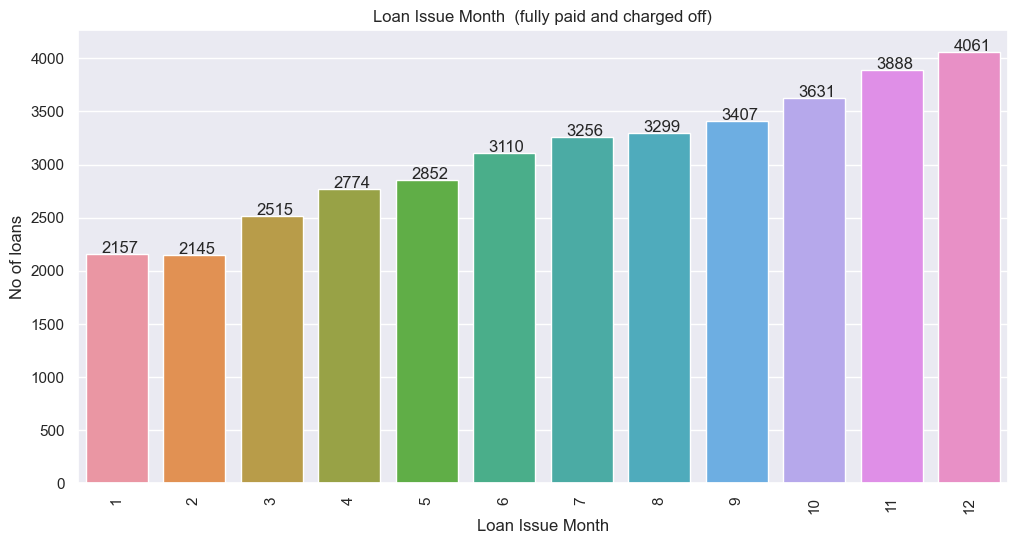

In [237]:
#Bivariate for issue_m
fig, ax = plt.subplots(figsize=(12,6)  , dpi=100)
plt.xticks(rotation=90)
sns.countplot(x='issue_m',  data=df1)
              

ax.set_xlabel('Loan Issue Month')
ax.set_ylabel('No of loans')

ax.set_title('Loan Issue Month  (fully paid and charged off)')
autolabel(ax,0.20)


plt.show()

**Observation**
- This shows loans given in the later months particularly Oct, Nov, Dec is high compared to first two quarters.


## A.2)  Un-ordered categorical data



### Loan Status

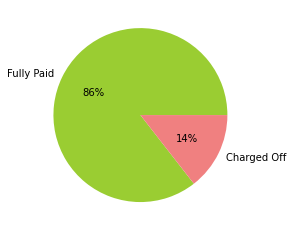

In [73]:
import matplotlib.pyplot as plt

data = df1.loan_status_code.value_counts()
labels = ['Fully Paid','Charged Off']
colors = ['yellowgreen', 'lightcoral']

plt.pie(data, labels=labels,colors = colors, autopct = '%0.0f%%')

plt.show()


**Observation**
- This shows 15 % of the loans are charged off


### Loans issued grouped by State

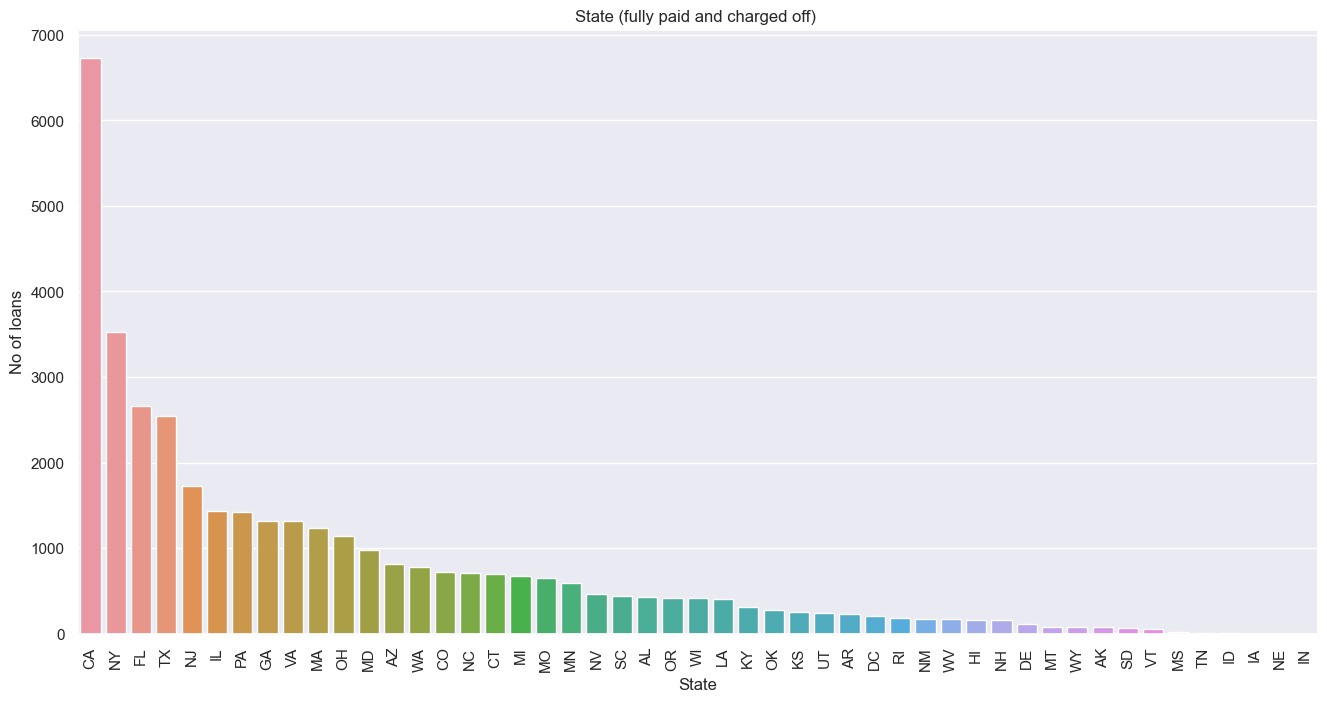

In [235]:
fig, ax = plt.subplots(figsize=(16,8)  , dpi=100)

sns.countplot(x='addr_state', 
              data=df1, 
              order = df1.addr_state.value_counts().index)
    
ax.set_xlabel('State')
ax.set_ylabel('No of loans')

ax.set_title('State (fully paid and charged off) ')
plt.xticks(rotation=90)

plt.show()


**Observation**
- States CA, NY, FL and TX are the states for which loans have been issued

## Purpose of the loan for which loans are issued  (fully paid and charged off) 



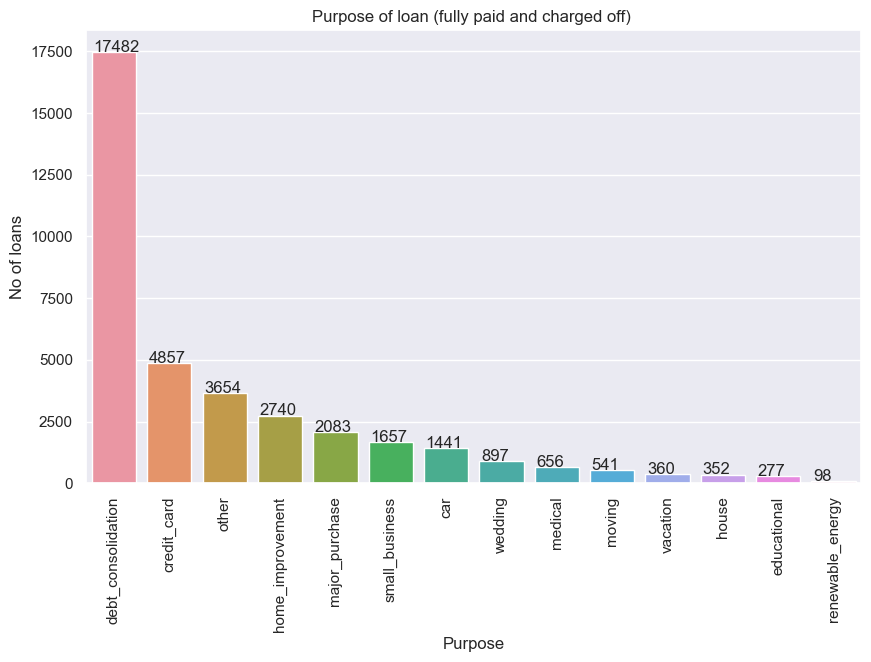

In [234]:
fig, ax = plt.subplots(figsize=(10,6)  , dpi=100)

sns.countplot(x='purpose', 
              data=df1, 
              order = df1.purpose.value_counts().index)
    
ax.set_xlabel('Purpose')
ax.set_ylabel('No of loans')

ax.set_title('Purpose of loan (fully paid and charged off) ')
plt.xticks(rotation=90)
autolabel(ax,0.03)

plt.show()

**Observation**
- Loan are given for debt consolidation, paying off Credit card and 'other' reasons 
- Education and renewable energy is the lest category


## Loans issued grouped by home ownership 



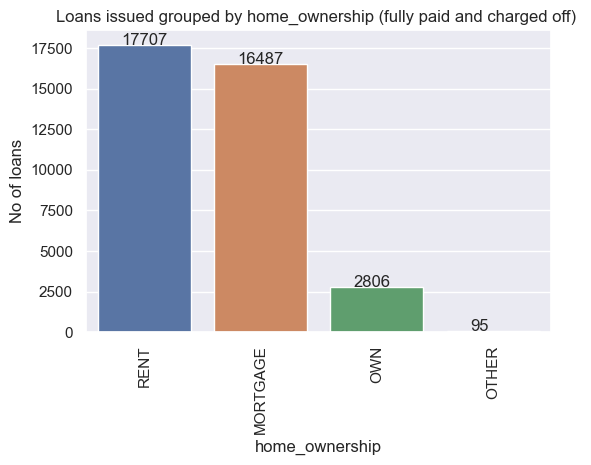

In [233]:
fig, ax = plt.subplots(figsize=(6,4)  , dpi=100)

sns.countplot(x='home_ownership', 
              data=df1, 
              order = df1.home_ownership.value_counts().index)
    
ax.set_xlabel('home_ownership')
ax.set_ylabel('No of loans')

ax.set_title('Loans issued grouped by home_ownership (fully paid and charged off) ')
plt.xticks(rotation=90)

autolabel(ax,0.20)
plt.show()

**Observation**
- People who are in Rented house or Mortgate are the maximum who got the loans


## B) Quantitative

## Impact of interest rate on loans issued (fully paid and charged off)



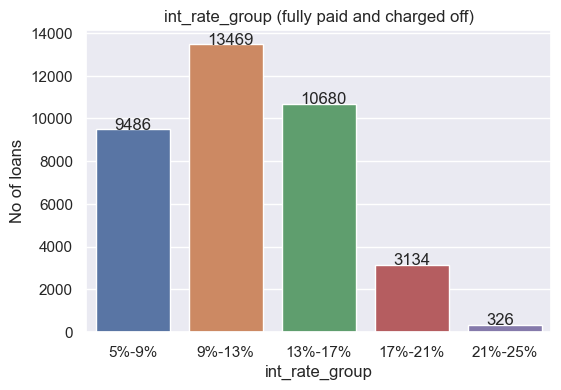

In [243]:
import seaborn as sns

fig, ax = plt.subplots(figsize=(6,4)  , dpi=100)

sns.countplot(x='int_rate_group', 
              data=df1)
 
ax.set_xlabel('int_rate_group')
ax.set_ylabel('No of loans')

ax.set_title('int_rate_group (fully paid and charged off)')
autolabel(ax,0.20)

plt.show()

**Observation**
- Interest rate range 9 to 13 is the range where maximum loans have been issued
- Least being 21 - 25%


## Annual income of the persons who got the loan (fully paid and charged off) 





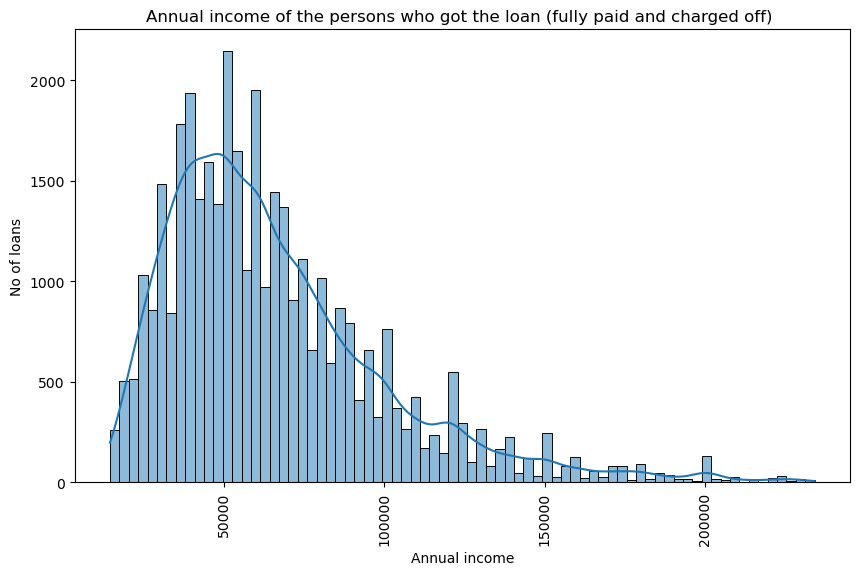

In [131]:
fig, ax = plt.subplots(figsize=(10,6)  , dpi=100)

sns.histplot(x='annual_inc', data=df1, palette = "Set2", kde = True,bins=75)
    
ax.set_xlabel('Annual income')
ax.set_ylabel('No of loans')
ax.set_title('Annual income of the persons who got the loan (fully paid and charged off) ')
plt.xticks(rotation=90)

plt.show()


**Observation**
- Maximum loans are given for the people with salary around 50k USD

## Loan amount  (fully paid and charged off) 


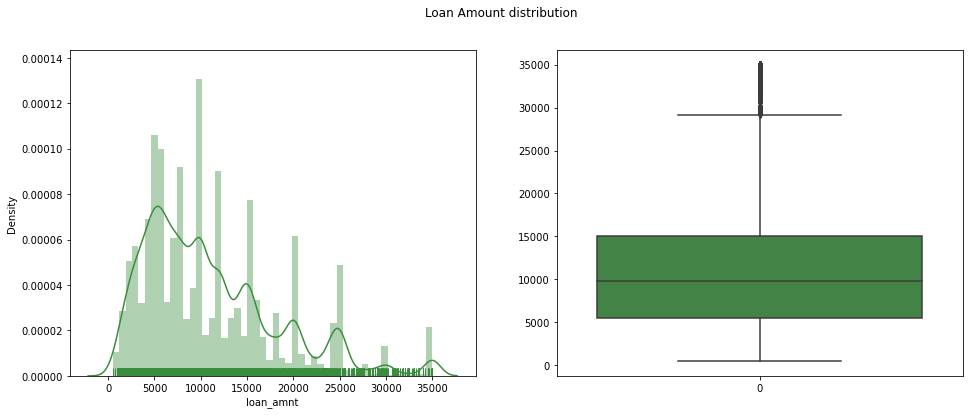

In [128]:
plt.figure(figsize=(16,6))
plt.subplot(1,2,1)

sns.distplot(a=df1.loan_amnt, rug=True, color='#388E3C')
plt.subplot(1,2,2)

sns.boxplot(data=df1.loan_amnt,color='#388E3C')
plt.suptitle('Loan Amount distribution')
plt.show()

**Observation**
- Loan amount is ranging from 5000 to 15000 USD

## Funded amount  (fully paid and charged off) 


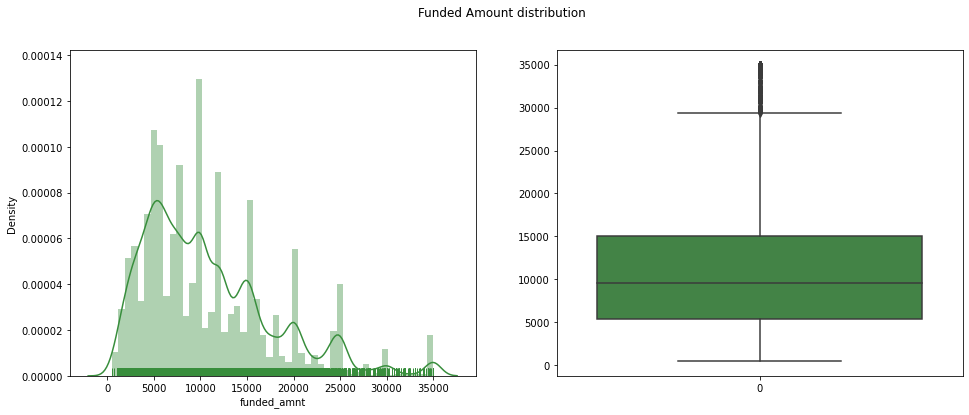

In [129]:
plt.figure(figsize=(16,6))
plt.subplot(1,2,1)
sns.distplot(a=df1.funded_amnt, rug=True,    color='#388E3C')
plt.subplot(1,2,2)
sns.boxplot(data=df1.funded_amnt, color='#388E3C')
plt.suptitle('Funded Amount distribution')
plt.show()

**Observation**
- Funded amount is also ranging from 5000 to 15000 USD

## installment amount  (fully paid and charged off) 

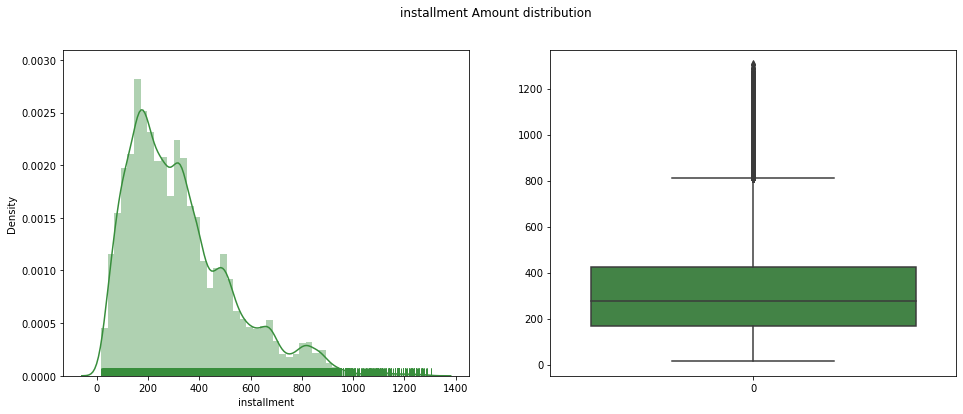

In [132]:
plt.figure(figsize=(16,6))
plt.subplot(1,2,1)
sns.distplot(a=df1.installment, rug=True,    color='#388E3C')
plt.subplot(1,2,2)
sns.boxplot(data=df1.installment, color='#388E3C')
plt.suptitle('installment Amount distribution')
plt.show()

**Observation**
- Instalment amount is ranging from 200 to 400 USD

## Loan amount to annual income ratio (fully paid and charged off) 

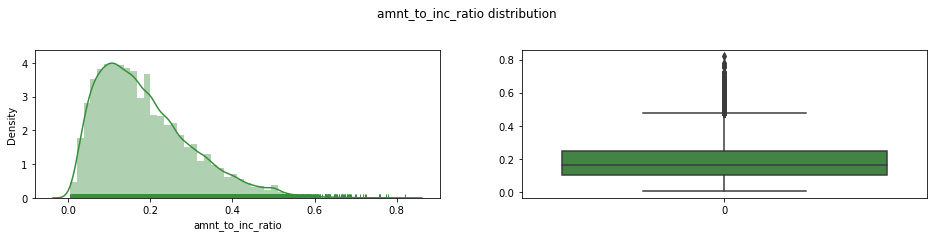

In [215]:
plt.figure(figsize=(16,6))
plt.subplot(2,2,1)
sns.distplot(a=df1.amnt_to_inc_ratio, rug=True,    color='#388E3C')
plt.subplot(2,2,2)
sns.boxplot(data=df1.amnt_to_inc_ratio, color='#388E3C')
plt.suptitle('amnt_to_inc_ratio distribution')
plt.show()

**Observation**

- the amount to income ratio median is around 0.18
- this is a good indicator 

## Summary of univariate analaysis

- Grade A and B are given more loans compared to other grades
- Grade A4, B3, A5, B5, B4 are given more loans compared to other grades
- 36 months loans are issued more compared to 60 months loan
- Employees with 10 years and above are given loan comapred with lesser experience
- Lending club has been given more loans in 2011 compared with previous years and its doubling every year
- Loans given in the later months particularly Oct, Nov, Dec is high compared to first two quarters.
- 15 % of the loans are charged off
- States CA, NY, FL and TX are the states for which loans have been issued
- Loan are given for debt consolidation, paying off Credit card and 'other' reasons 
- Education and renewable energy is the lest category
- People who are in Rented house or Mortgate are the maximum who got the loans
- Interest rate range 9 to 13 is the range where maximum loans have been issued
- Least being 21 - 25%
- Maximum loans are given for the people with salary around 50k USD
- Loan amount is ranging from 5000 to 15000 USD
- Funded amount is also ranging from 5000 to 15000 USD
- Instalment amount is ranging from 200 to 400 USD
- The amount to income ratio median is around 0.18;  this is a good indicator 



## Bivariate Analysis

Following fields will be checked against loan status


##### A.1) Ordered categorical data
- Grade 
- Sub grade 
- Term (36 / 60 months) 
- Employment length 
- Year  
- Month


##### A.2)  Un-ordered categorical data
- State 
- Loan purpose 
- Home Ownership 
- Verified status

#### B) Quantitative
- Interest rate 
- Annual income 
- DPI 
- Loan amount to annual income ratio 


# Bivariate Analysis - Ordered categorical 

## impact of Grade on Loan status

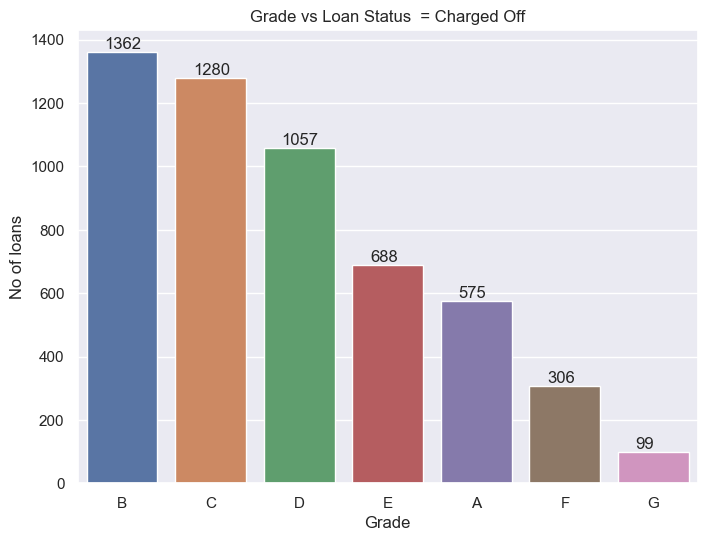

In [245]:
fig, ax = plt.subplots(figsize=(8,6)  , dpi=100)

sns.countplot(x='grade',  
              data=df1[df1.loan_status == "Charged Off"], 
              order = df1[df1.loan_status=="Charged Off"].grade.value_counts().index)

ax.set_xlabel('Grade')
ax.set_ylabel('No of loans')

ax.set_title('Grade vs Loan Status  = Charged Off')
autolabel(ax,0.20)

plt.show()

#TODO movethis to univariage segmented analysis


**Observation**

- the amount to income ratio median is around 0.18
- this is a good indicator 

##  Grade wise loan issued, and Charged off status

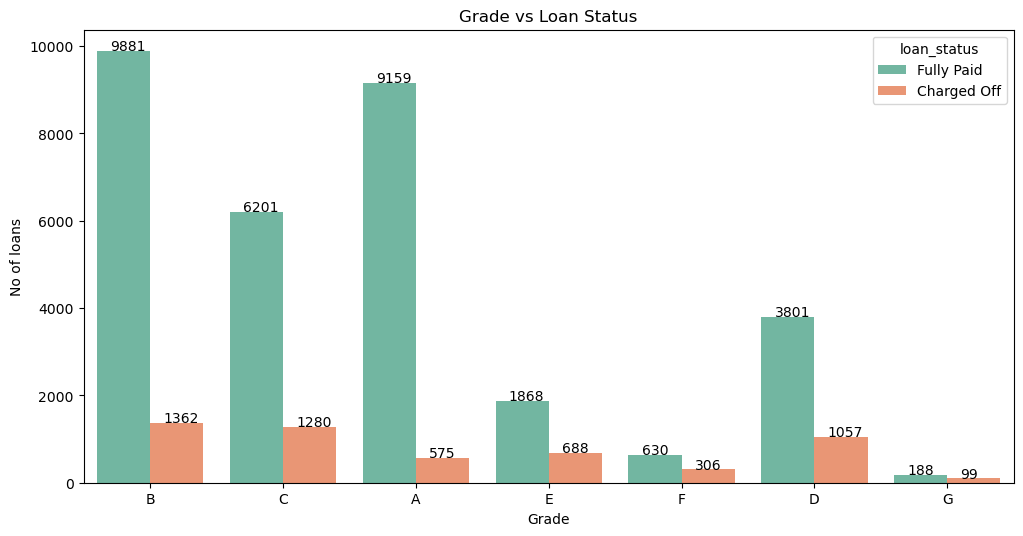

In [199]:

fig, ax = plt.subplots(figsize=(12,6)  , dpi=100)
#sns.countplot(x='verification_status', data=df1)

sns.countplot(x='grade', hue="loan_status", 
              data=df1, 
              palette = "Set2")

ax.set_xlabel('Grade')
ax.set_ylabel('No of loans')

autolabel(ax,0.1)
ax.set_title('Grade vs Loan Status')

plt.show()

## impact of Sub Grade on Loan status

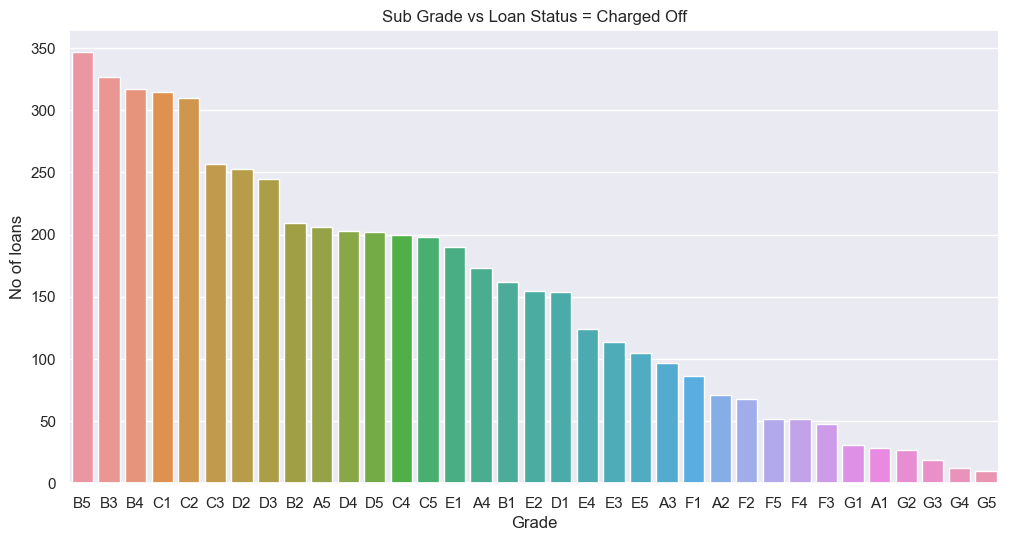

In [246]:

fig, ax = plt.subplots(figsize=(12,6)  , dpi=100)
#sns.countplot(x='verification_status', data=df1)

sns.countplot(x='sub_grade',  
              data=df1[df1.loan_status == "Charged Off"], 
              order = df1[df1.loan_status=="Charged Off"].sub_grade.value_counts().index)

ax.set_xlabel('Grade')
ax.set_ylabel('No of loans')

ax.set_title('Sub Grade vs Loan Status = Charged Off')
#autolabel(ax,0.20)

plt.show()



## To check whether 'Term' has impact on 'Loan status'

Text(0.5, 1.0, 'Term vs Loan Status(Charged off)')

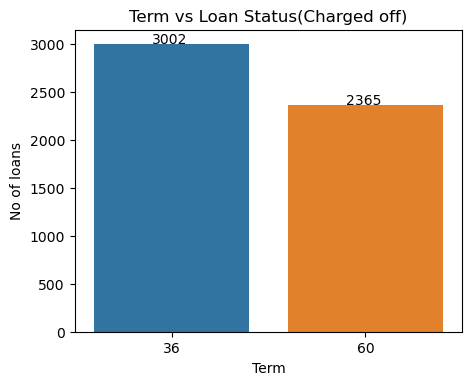

In [175]:
fig, ax = plt.subplots(figsize=(5,4)  , dpi=100)
#sns.countplot(x='verification_status', data=df1)

sns.countplot(x='term',  
              data=df1[df1.loan_status=="Charged Off"], 
              order = df1[df1.loan_status=="Charged Off"].term.value_counts().index)

    
ax.set_xlabel('Term')
ax.set_ylabel('No of loans')

autolabel(ax,0.30)
ax.set_title('Term vs Loan Status(Charged off)')

## To check whether 'Employment length' has impact on 'Loan status'

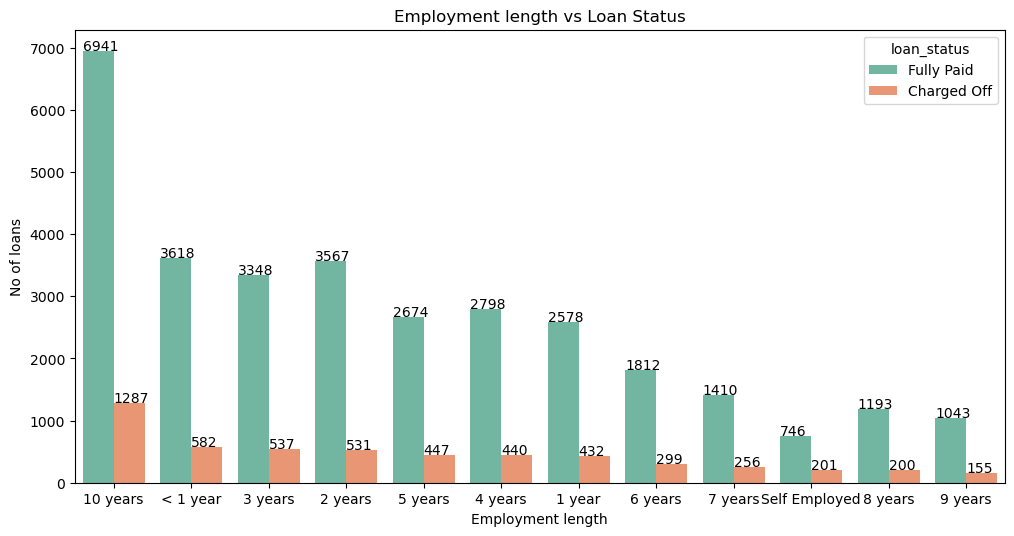

In [150]:
# why it is not significantly different?  

fig, ax = plt.subplots(figsize=(12,6)  , dpi=100)
#sns.countplot(x='verification_status', data=df1)

sns.countplot(x='emp_length', hue="loan_status", 
              data=df1, 
              palette = "Set2", 
              order = df1[df1.loan_status=="Charged Off"].emp_length.value_counts().index)

    
ax.set_xlabel('Employment length')
ax.set_ylabel('No of loans')

ax.set_title('Employment length vs Loan Status')
autolabel(ax,0.001)


#Yes there is impact
#People who have exp in the range of 
# zero to two years
# more than 10 years tend to default
# in that > 10 are significantly high defaulters



## To view loan status grouped by year

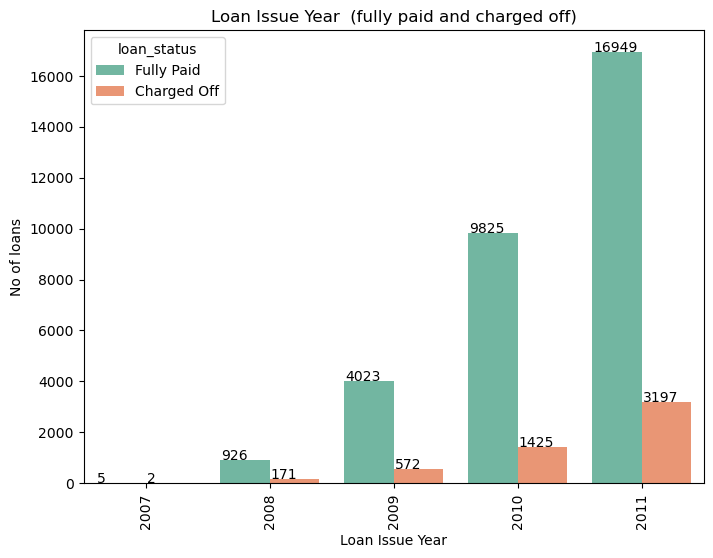

In [178]:
#Bivariate for issue_y
fig, ax = plt.subplots(figsize=(8,6)  , dpi=100)
plt.xticks(rotation=90)
sns.countplot(x='issue_y',
              data=df1, hue="loan_status",
              palette = "Set2")
              

ax.set_xlabel('Loan Issue Year')
ax.set_ylabel('No of loans')

autolabel(ax,0.01)
ax.set_title('Loan Issue Year  (fully paid and charged off)')

plt.show()


## To view loan status grouped by month


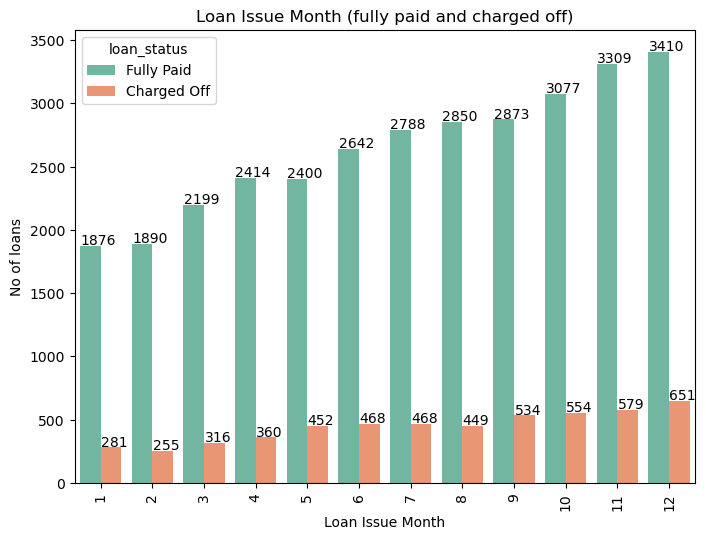

In [179]:
#Bivariate for issue_y
fig, ax = plt.subplots(figsize=(8,6)  , dpi=100)
plt.xticks(rotation=90)
sns.countplot(x='issue_m',
              data=df1, hue="loan_status",
              palette = "Set2")
              

ax.set_xlabel('Loan Issue Month')
ax.set_ylabel('No of loans')

autolabel(ax,0.01)
ax.set_title('Loan Issue Month (fully paid and charged off)')

plt.show()


# Bivariate Analysis - Unordered categorial data

## To check whether 'Loan purpose' has impact on 'Loan status'

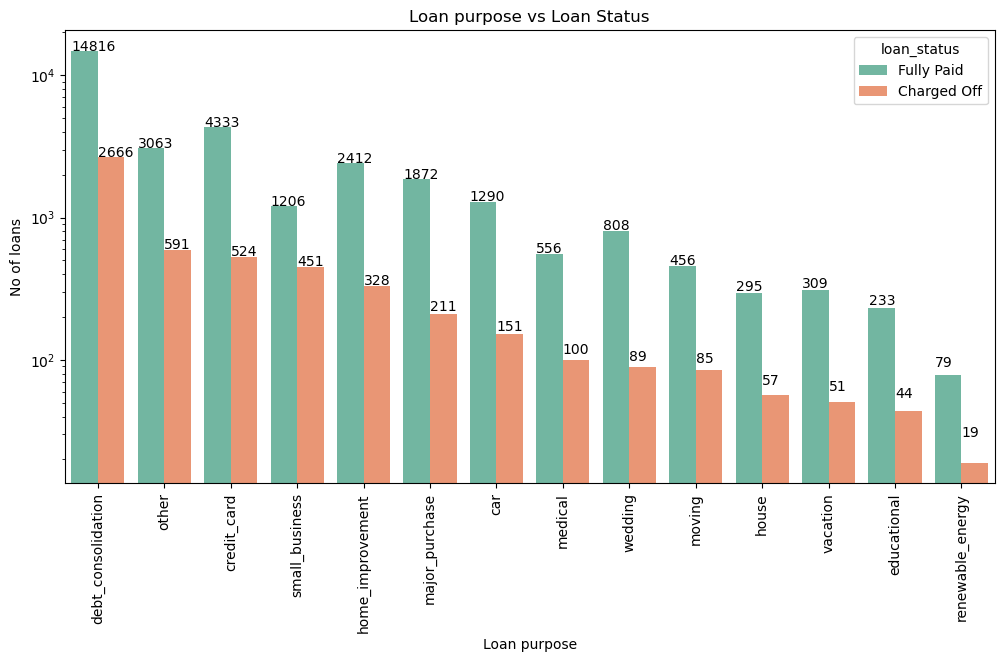

In [146]:
import seaborn as sns

fig, ax = plt.subplots(figsize=(12,6)  , dpi=100)
ax.set(yscale = 'log')
plt.xticks(rotation=90)
sns.countplot(x='purpose', hue="loan_status", 
              data=df1, 
              palette = "Set2", 
              order = df1[df1.loan_status=="Charged Off"].purpose.value_counts().index)

ax.set_xlabel('Loan purpose')
ax.set_ylabel('No of loans')

ax.set_title('Loan purpose vs Loan Status')
autolabel(ax,0.001)

plt.show()


#Result - yes debt consolidateion, other, credit crd, small business and home improvement show a significant charged off
#Loan purpose is a driver 

**Observation**
- Loans with purpose debt consolidation, other, credit crd, small business and home improvement categories have failed to pay the loan compared with education / renewable energy
- Also debt consolidation is the top reason where 2666 loans have been Charged off



## To check whether 'Home Ownership' has impact on 'Loan status'

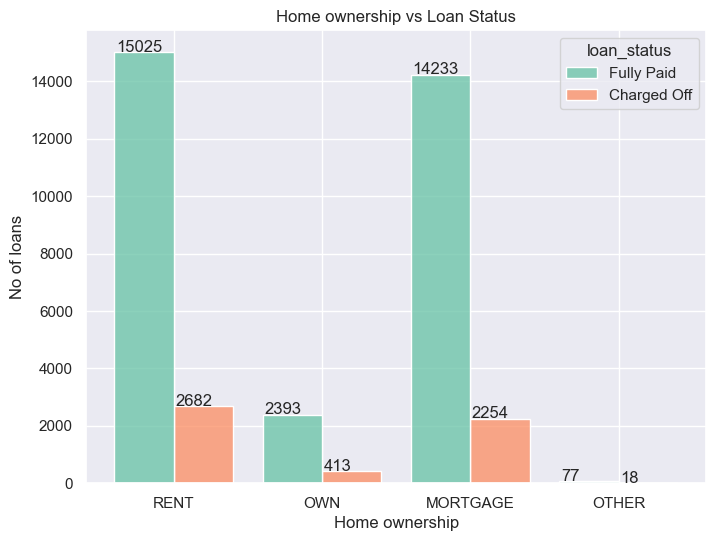

In [250]:

fig, ax = plt.subplots(figsize=(8,6)  , dpi=100)

sns.histplot(data=df1, x="home_ownership", hue="loan_status", 
             multiple="dodge", shrink=.8,
             palette = "Set2")
    
ax.set_xlabel('Home ownership')
ax.set_ylabel('No of loans')

ax.set_title('Home ownership vs Loan Status')

autolabel(ax,0.01)


**Observation**

- People who are in Rent or Mortage have failed to pay the loan compared with people in Own house 



## To check whether 'Verification' has impact on 'Loan status'

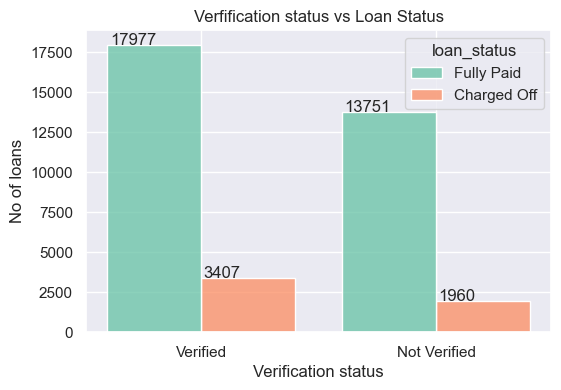

In [251]:
fig, ax = plt.subplots(figsize=(6,4)  , dpi=100)

sns.histplot(data=df1, x="verification_status", hue="loan_status", 
             multiple="dodge", shrink=.8,
             palette = "Set2")
    
ax.set_xlabel('Verification status')
ax.set_ylabel('No of loans')

ax.set_title('Verfification status vs Loan Status')
autolabel(ax,0.01)

plt.show()


**Observation**

- Verified loans are Fully Paid off compared to Not verified
- The amount of Verified loans which are Charged Off is more compared to Not Verified


## Impact of State on Loan status

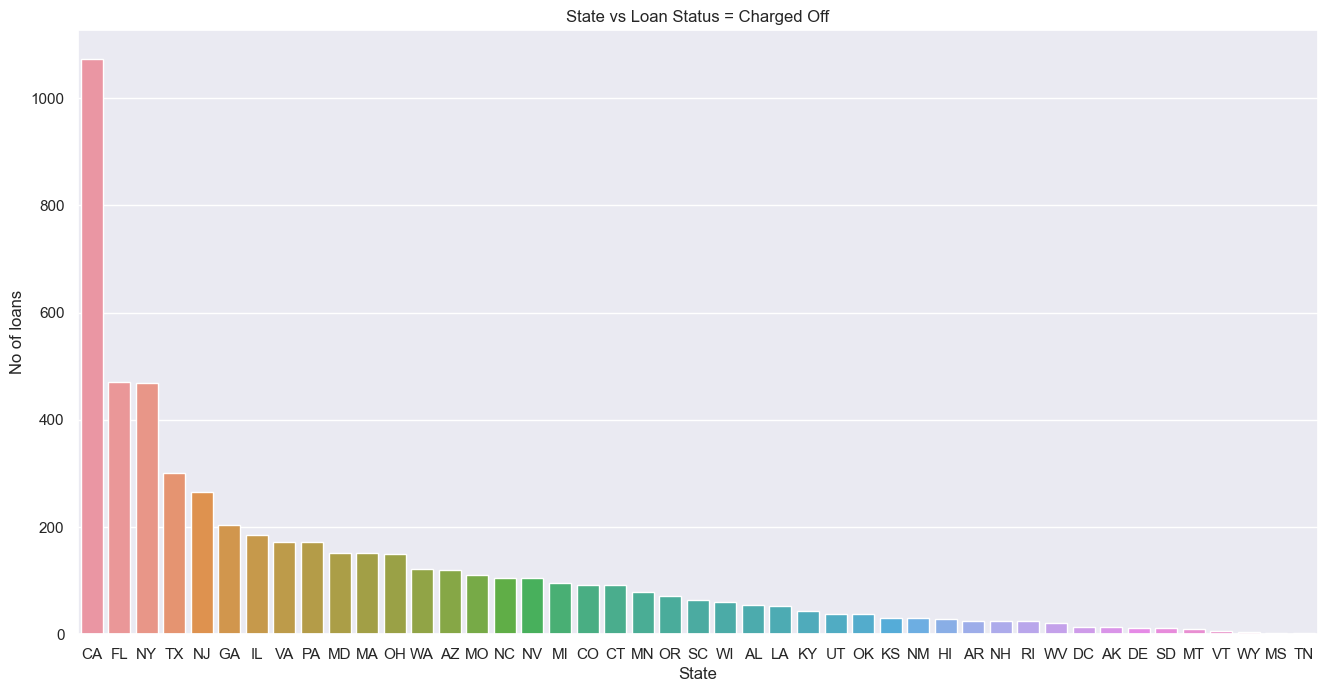

In [255]:

fig, ax = plt.subplots(figsize=(16,8)  , dpi=100)

sns.countplot(x='addr_state',  
              data=df1[df1.loan_status == "Charged Off"], 
              order = df1[df1.loan_status=="Charged Off"].addr_state.value_counts().index)

ax.set_xlabel('State')
ax.set_ylabel('No of loans')

ax.set_title('State vs Loan Status = Charged Off')

plt.show()


**Observation**

- States CA, NY, FL and TX are the states for which *more* loans have been issued
- Of which they are the same states where the Charged Off is also more


## Impact of Purpose on loan amount for Charged Off status

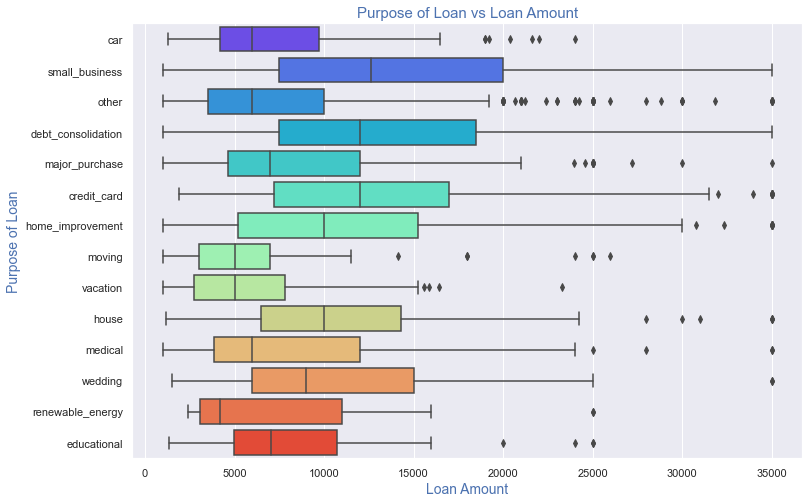

In [258]:
# Bivariate Analysis 

plt.figure(figsize=(12,8))
ax = sns.boxplot(y='purpose', x='loan_amnt', data =df1[df1.loan_status=="Charged Off"],palette='rainbow')
ax.set_title('Purpose of Loan vs Loan Amount',fontsize=15,color='b')
ax.set_ylabel('Purpose of Loan',fontsize=14,color = 'b')
ax.set_xlabel('Loan Amount',fontsize=14,color = 'b')
plt.show()


**Observation**

- Small businss, debt consolidation, credit card and home improvement are the top four categories that got high loan amount which become Charged Off



## Impact of Employment length on loan amount for Charged Off status

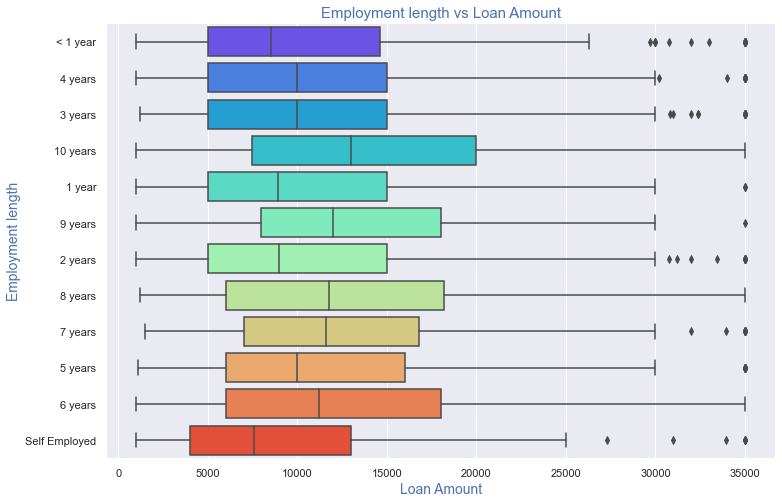

In [259]:
# Bivariate Analysis 

plt.figure(figsize=(12,8))
ax = sns.boxplot(y='emp_length', x='loan_amnt', data =df1[df1.loan_status=="Charged Off"],palette='rainbow')
ax.set_title('Employment length vs Loan Amount',fontsize=15,color='b')
ax.set_ylabel('Employment length',fontsize=14,color = 'b')
ax.set_xlabel('Loan Amount',fontsize=14,color = 'b')
plt.show()



**Observation**

- Employment length of 10 years got more loans and they are the maximum defaulters
- Followed by year 6, 7, 8 and 9 where the medians are almost close



## Impact of Grade on loan amount for Charged Off status

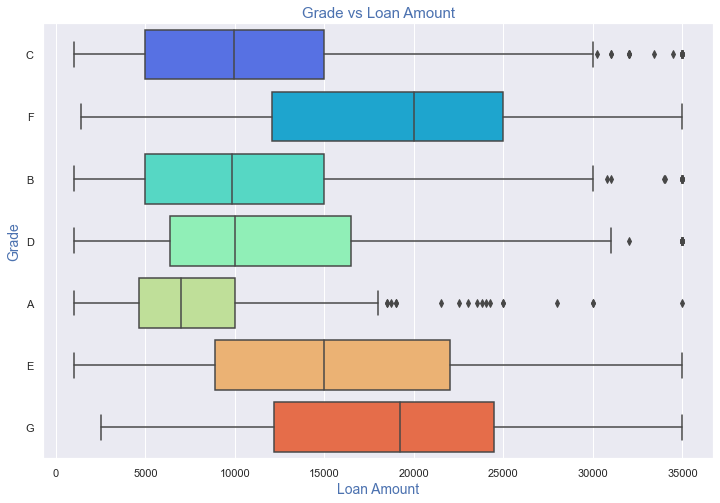

In [260]:
# Bivariate Analysis 

plt.figure(figsize=(12,8))
ax = sns.boxplot(y='grade', x='loan_amnt', data =df1[df1.loan_status=="Charged Off"],palette='rainbow')
ax.set_title('Grade vs Loan Amount',fontsize=15,color='b')
ax.set_ylabel('Grade',fontsize=14,color = 'b')
ax.set_xlabel('Loan Amount',fontsize=14,color = 'b')
plt.show()


**Observation**

- Grade F, G and E are the three category which are top three in Charged off
- Grade F and G have the median around 20k and Q3 at 25k
- Grade A is the least with median at 7.5k


## Impact of State on loan amount for charged off status

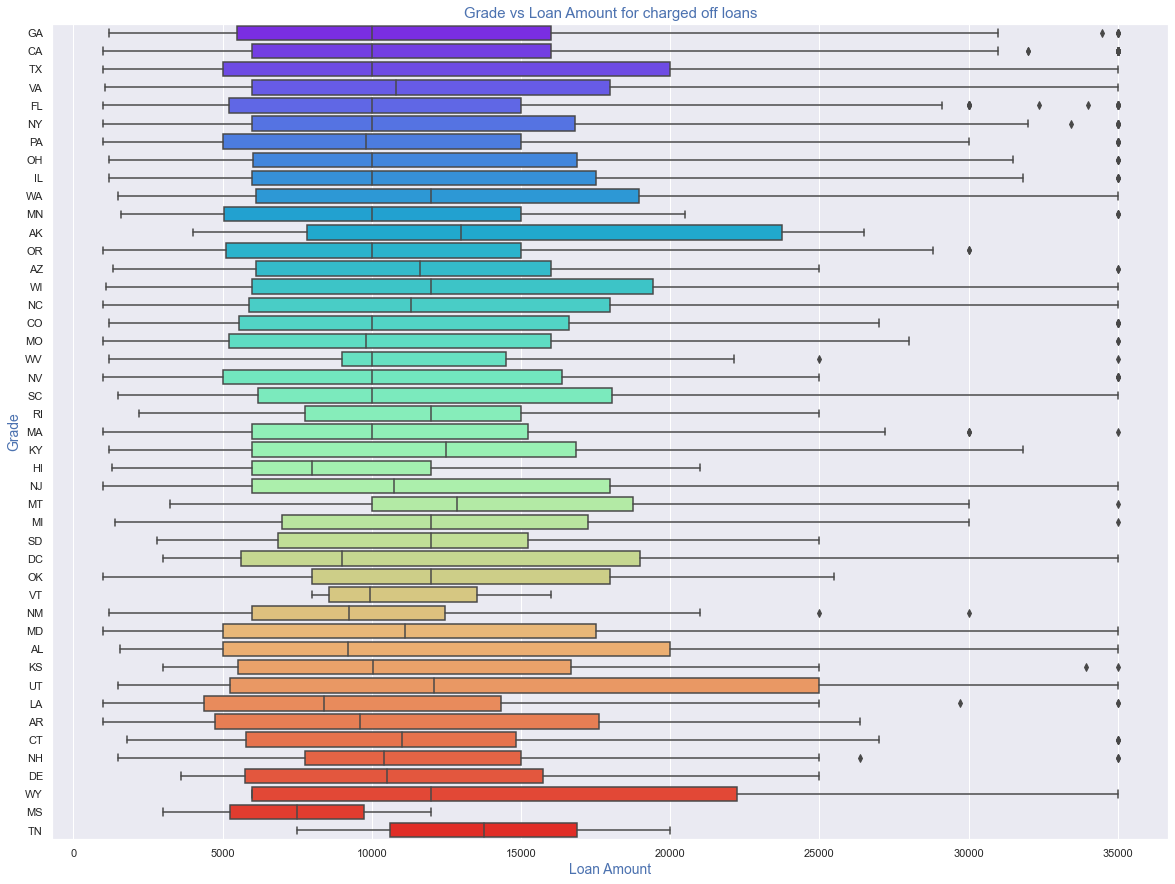

In [268]:
# Bivariate Analysis

plt.figure(figsize=(20,15))
ax = sns.boxplot(y='addr_state', x='loan_amnt', data =df1[df1.loan_status=="Charged Off"],palette='rainbow')
ax.set_title('Grade vs Loan Amount for charged off loans',fontsize=15,color='b')
ax.set_ylabel('Grade',fontsize=14,color = 'b')
ax.set_xlabel('Loan Amount',fontsize=14,color = 'b')
plt.show()


**Observation**

- Many states median is at 10k for charged off loan
- State AK, MT, KY, UT, TN are marginally above the 10k level and at 13k 
- States AK, UT the Q3 is at 23k 



# Bivariate Analysis - Quantitative


## Impact of interest on Loan status


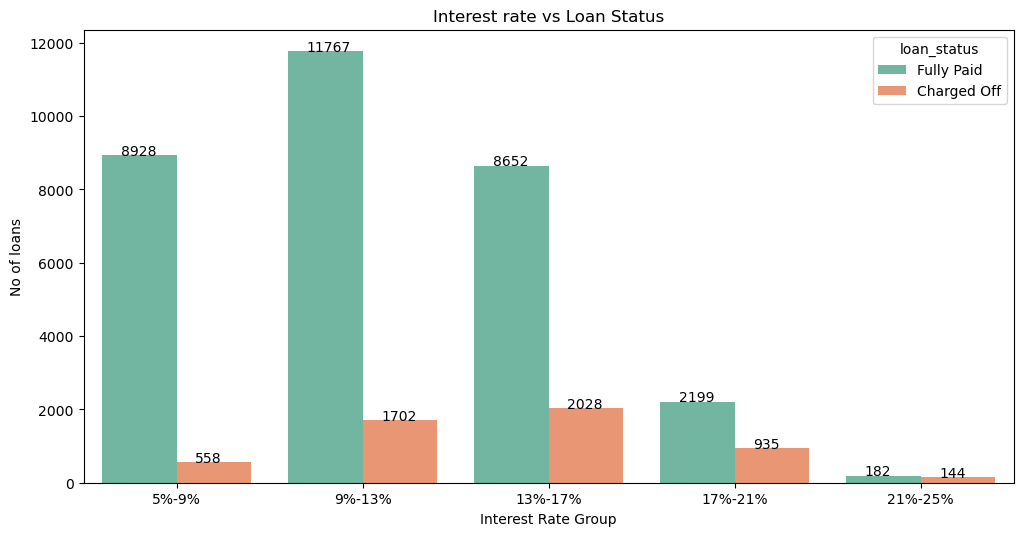

In [192]:
fig, ax = plt.subplots(figsize=(12,6)  , dpi=100)

sns.countplot(x='int_rate_group', hue="loan_status", 
              data=df1, 
              palette = "Set2")

ax.set_xlabel('Interest Rate Group')
ax.set_ylabel('No of loans')

ax.set_title('Interest rate vs Loan Status')

autolabel(ax,0.1)
plt.show()

**Observation**

- Interest rate group 9%-13% and 13%-17% are having maximum defaulters
- Thought interest rate is high 21% - 25% 182 people has fully paid and 144 failed to pay; this cateogory has the maximum failure rate


## Impact of Annual income on Loan status

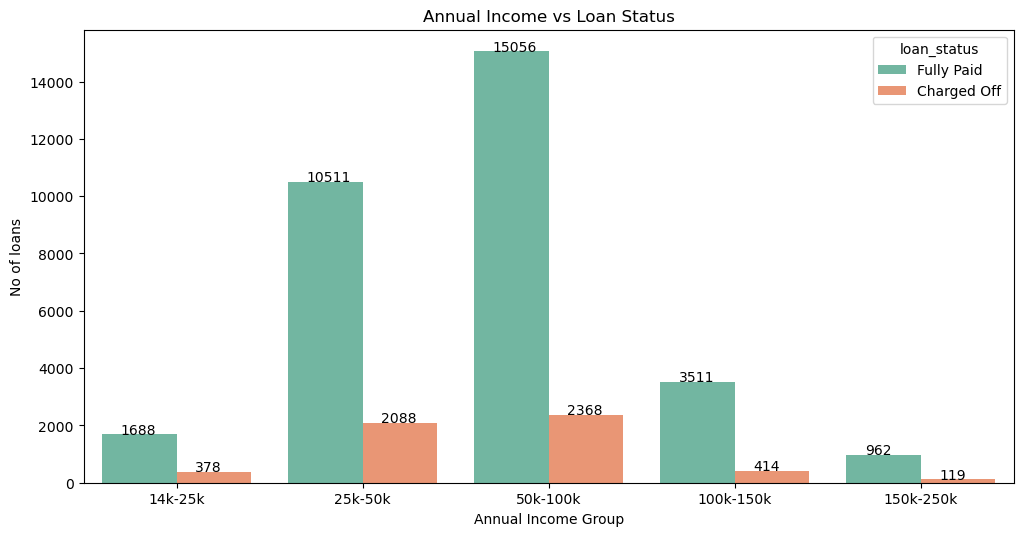

In [194]:
fig, ax = plt.subplots(figsize=(12,6)  , dpi=100)

sns.countplot(x='annual_inc_group', hue="loan_status", 
              data=df1, 
              palette = "Set2")

ax.set_xlabel('Annual Income Group')
ax.set_ylabel('No of loans')

autolabel(ax,0.1)
ax.set_title('Annual Income vs Loan Status')

plt.show()


**Observation**

- Annual income group 25k-50k and 50k-100k are having maximum defaulters
- The 150k to 250k annual income group is the safest; only 119 defaulters compared to 962 people fully paid


## Impact of DTI on Loan status

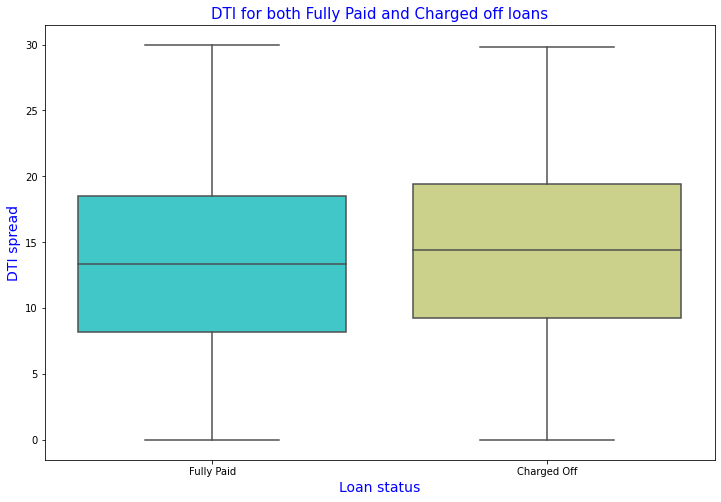

In [209]:
# Bivariate Analysis 

plt.figure(figsize=(12,8))
ax = sns.boxplot(y='dti', x='loan_status', data =df1,palette='rainbow')
ax.set_title('DTI for both Fully Paid and Charged off loans',fontsize=15,color='b')
ax.set_ylabel('DTI spread',fontsize=14,color = 'b')
ax.set_xlabel('Loan status',fontsize=14,color = 'b')
plt.show()


**Observation**

- DTI dosent seem to be contributing because the median is close to each other for Fully Paid and Charged Off

## Impact of amnt_to_inc_ratio on Loan status

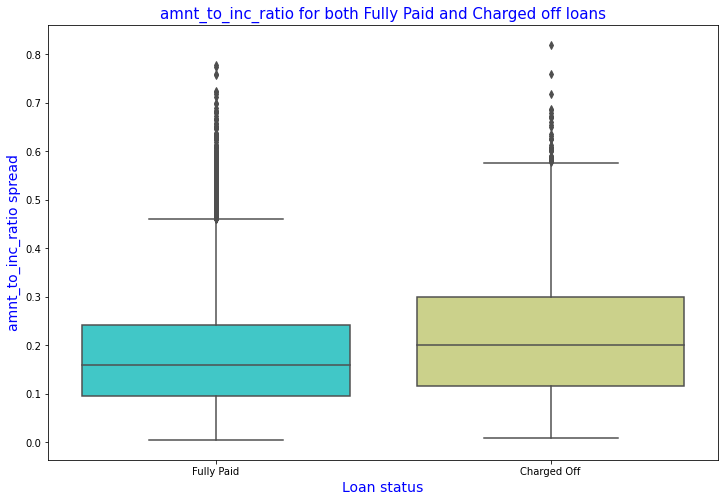

In [210]:
# Bivariate Analysis

plt.figure(figsize=(12,8))
ax = sns.boxplot(y='amnt_to_inc_ratio', x='loan_status', data =df1,palette='rainbow')
ax.set_title('amnt_to_inc_ratio for both Fully Paid and Charged off loans',fontsize=15,color='b')
ax.set_ylabel('amnt_to_inc_ratio spread',fontsize=14,color = 'b')
ax.set_xlabel('Loan status',fontsize=14,color = 'b')
plt.show()


**Observation**

- Amnt_to_int_ratio is contributing for bad loans 
- This is evident looking at the box plot


## To check whether 'Purpose' has impact on 'Interest rate'



Text(0.5, 1.0, 'Term vs Loan Status(Charged off)')

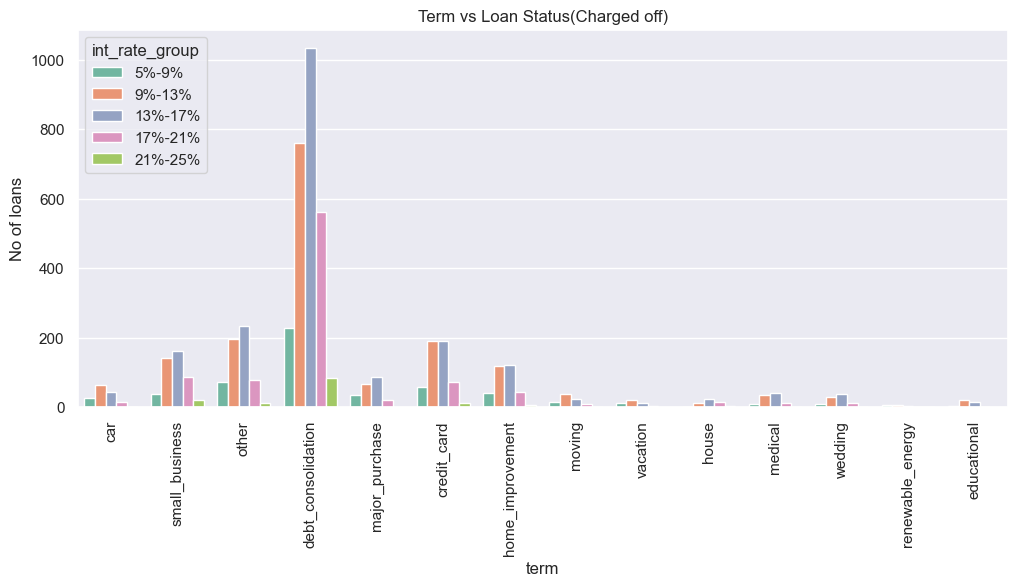

In [219]:

fig, ax = plt.subplots(figsize=(12,5)  , dpi=100)

sns.countplot(x='purpose',  hue = "int_rate_group",
              data=df1[df1.loan_status=="Charged Off"], 
              palette = "Set2")


#ax.set(yscale = 'log')
plt.xticks(rotation=90)
    
ax.set_xlabel('term')
ax.set_ylabel('No of loans')

ax.set_title('Term vs Loan Status(Charged off)')


**Observation**

- Yes we can see debt_consolidation, small business, credit card and other have got loans for high interest rate


 ## Analysis : Loan amount is high for longer duration loans 

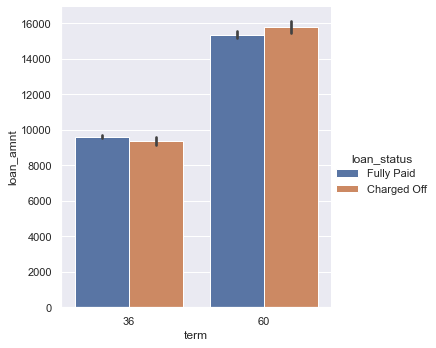

In [221]:

sns.set(style="darkgrid")

ax = sns.catplot(x = 'term', y = 'loan_amnt', data = df1,hue = 'loan_status', kind = 'bar')

plt.show()


**Observation**

- Loan amount is consistently high for 60 months term compared with 36 months term loan

# Summary of observation


- Loans with purpose debt consolidation, other, credit crd, small business and home improvement categories have failed to pay the loan compared with education / renewable energy
- Also debt consolidation is the top reason where 2666 loans have been Charged off
- People who are in Rent or Mortage have failed to pay the loan compared with people in Own house
- The amount of Verified loans which are Charged Off is more compared to Not Verified

- States CA, NY, FL and TX are the states for which *more* loans have been issued
- Of which they are the same states where the Charged Off is also more

- Small businss, debt consolidation, credit card and home improvement are the top four categories that got high loan amount which become Charged Off

- Employment length of 10 years got more loans and they are the maximum defaulters
- Followed by year 6, 7, 8 and 9 where the medians are almost close

- Grade F, G and E are the three category which are top three in Charged off
- Grade F and G have the median around 20k and Q3 at 25k
- Grade A is the least with median at 7.5k

- Many states median is at 10k for charged off loan
- State AK, MT, KY, UT, TN are marginally above the 10k level and at 13k 
- States AK, UT the Q3 is at 23k 

- Interest rate group 9%-13% and 13%-17% are having maximum defaulters
- Thought interest rate is high 21% - 25% 182 people has fully paid and 144 failed to pay; this cateogory has the maximum failure rate

- Annual income group 25k-50k and 50k-100k are having maximum defaulters
- The 150k to 250k annual income group is the safest; only 119 defaulters compared to 962 people fully paid

- DTI dosent seem to be contributing because the median is close to each other for Fully Paid and Charged Off

- Amnt_to_int_ratio is contributing for bad loans 
- This is evident looking at the box plot

- Loan amount is consistently high for 60 months term compared with 36 months term loan

- debt_consolidation, small business, credit card and other have got loans for high interest rate


## Segmented Univariate Analysis

## Derived Matrics Analysis

# Multivariate Analysis

## To visulize whether 'Income' & 'funded amount' has impact on 'Loan status'

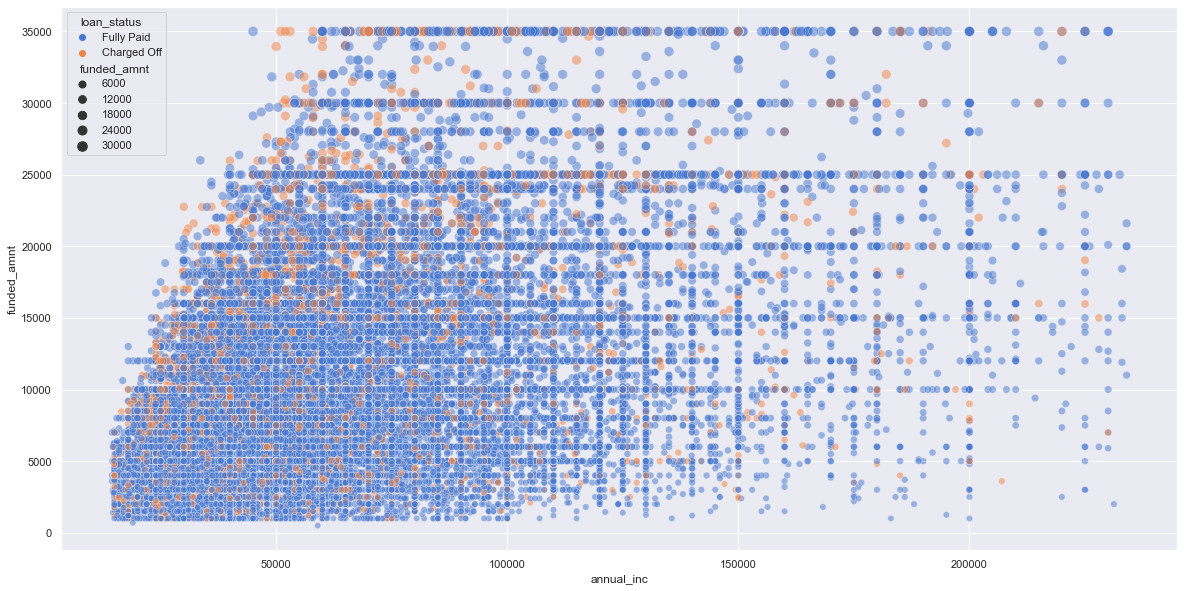

In [226]:
g = sns.scatterplot(data=df1, x="annual_inc", y="funded_amnt", hue="loan_status",size="funded_amnt",
            sizes=(40, 100), alpha=.5, palette="muted")


g.figure.set_dpi = 100
g.figure.set_figwidth(20)
g.figure.set_figheight(10)



**Observation**

- Income and Funded Amount has no direct correlation
- Also income and funded amount dosent seem to influence whether the loan will be Fully Paid / Charged Off


## To visulize whether 'DTI' & 'funded amount' has impact on 'Loan status'

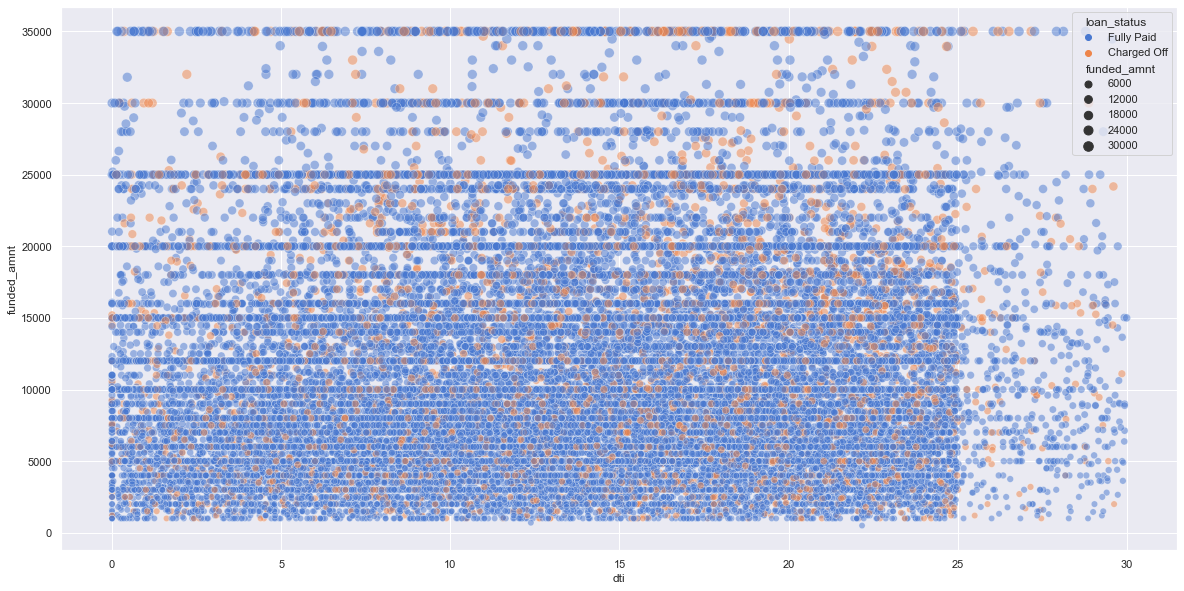

In [227]:
g = sns.scatterplot(data=df1, x="dti", y="funded_amnt", hue="loan_status",size="funded_amnt",
            sizes=(40, 100), alpha=.5, palette="muted")


g.figure.set_dpi = 100
g.figure.set_figwidth(20)
g.figure.set_figheight(10)


**Observation**

- DTI and Funded Amount has no direct correlation
- Also DTI and funded amount dosent seem to influence whether the loan will be Fully Paid / Charged Off





# There is a chance of loan being Charged off during the following conditions

## Based on analysis on Univariate and Bivariate
- Loan purpose is debt consolidateion, other, credit crd, small business and home improvement category
- Home ownership is either Rent or Mortgate
- Employment length is 10 years and above
- Interest rate is in 9% to 17% group
- annual income is between 25k to 100k group
- Annual income Q1 and Q3 is 42k to 83k 
- Grade of the person is B and C
- Sub Grade is B5, B3, B4, C1, C2 are the top 5 showing charged off
- State is CA, FL, NY, TX, NJ are the top 5 showing charged off

## Based on Derived metrics
- <text here>
- <text here>
- <text here>

## Based on Multivariate

- Income and Funded Amount has no direct correlation
- Also income and funded amount dosent seem to influence whether the loan will be Fully Paid / Charged Off
- DTI and Funded Amount has no direct correlation
- Also DTI and funded amount dosent seem to influence whether the loan will be Fully Paid / Charged Off


## Based on
- <text here>
- <text here>